### An analysis of paleo-present climate data

##### Project 2 for Programming for Data Analysis module, Semester 2, HDip in Data Analytics at ATU, Galway 2023/24 
##### Author: Shane Keenan 


<img src="https://th.bing.com/th/id/R.ae6f8e0c3318eec126af7f75d9cd9a4b?rik=ZhfQPn9RJqMPdQ&pid=ImgRaw&r=" alt="Alt text" width="900"/>


---


### Contents 

1. Introduction - Climate change 
2. Objective of project - project statement
3. Paleoclimatology - how is data collected about the historic climate of the planet ?  
4. Data sets for this work - Temperature, CO2 and Methane - describe, import and visualise. 

5. Reprocessing for Exploratory data analysis - correlation coefficients.   

6. Export dataframe to csv and json 
6. Train model using split data set and Linear regression  
7. Use model to simulate data for test 
8. Evaluate 


## 1. Introduction - Climate change 

***

The climate is a very "hot" topic at the moment (pun) and has become extremely political. We live in a time where climate models decide government policy which have major social and economic implications. With so much in the balance, it is extremely important that firstly the climate and our impact on it is well understood and secondly the data models are not only validate but put in context. 

Climate alarmists will have us believe we have only years left to move away from CO2 emitting fossil fuels before its too late but are their claims accurate... 

The current level of CO2 in the atmosphere is approx 420 ppm as shown from direct atmosperic measurements in Figure 1. 420 parts per million is equivalent to 0.042 % of the atmosphere. It doesn't sound like a lot but CO2 is a potent greenhouse gas.     




<img src="https://www.climate.gov/sites/default/files/styles/full_width_620_original_image/public/2023-08/ClimateDashboard-atmospheric-carbon-dioxide-graph-20230825-1400px.png?itok=S4XoakO7" alt="Alt text" width="500"/>



Figure 1. Direct CO2 measurements from the XXX 


CO2 levels have been rising sharpely post WW2 and are agrueably higher now than at any point in the past 800,000 years.. 

800,000 years may sound like a very long time.. however it is only very recent when you take into account the planet has approximately 4.6 Billion year history. So it is worth asking what were CO2 levels like prior to 800,000 years..   


We find the average CO2 levels on the planet were much higher in the past.  


<img src="https://co2coalition.org/wp-content/uploads/2021/08/CO2_07.jpg" alt="Alt text" width="900"/>








<img src="https://scx2.b-cdn.net/gfx/news/hires/2020/highfidelity.jpg" alt="Alt text" width="900"/>



### References

[1] 

[2]
 
[3]



https://www.climate.gov/sites/default/files/styles/full_width_620_original_image/public/2023-08/ClimateDashboard-atmospheric-carbon-dioxide-graph-20230825-1400px.png?itok=S4XoakO7

https://wattsupwiththat.com/2022/01/16/how-much-manmade-co2-is-in-the-atmosphere-really/









## 2. Project statement (from lecturer Brain McGinley)

***

- Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
- Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
- Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change 
signal in long-term Irish meteorological observations - ScienceDirect)
- Fuse and analyse data from various data sources and format fused data set as a pandas 
dataframe and export to csv and json formats
- For all of the above variables, analyse the data, the trends and the relationships between 
them (temporal leads/lags/frequency analysis).
- Predict global temperature anomaly over next few decades (synthesise data) and compare to 
published climate models if atmospheric CO2 trends continue
- Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)



## Objective 



https://www.ncei.noaa.gov/news/what-are-proxy-data

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide




Import revelvent python packages 

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.dates as mdates 
from matplotlib.ticker import MultipleLocator
import math as m
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.interpolate import CubicSpline
from datetime import datetime

## 4. Data sets - Temperature, Carbon dioxide (CO2) and Methane (CH4) 

Describe, import and visualise. 
***

### 4.1 CO2 data from Luthi et al Nature paper

Lüthi, D., Le Floch, M., Bereiter, B. et al. High-resolution carbon dioxide concentration record 650,000–800,000 years before present. Nature 453, 379–382 (2008). https://doi.org/10.1038/nature06949


atmospheric carbon dioxide concentrations can be determined by measuring the composition of air trapped in ice cores from Antarctica.

BP - Before Present 

How do they date the samples? what does "EDC3_gas_a" mean? 


METHODS SUMMARY

The analytical methods for routine CO2 measurements used at the University of
Bern and at LGGE in Grenoble are based on dry extraction techniques followed
by laser absorption spectroscopy and gas chromatography, respectively. In Bern,
four to six samples (23 3 23 3 16 mm; 8 g) from each depth level (every 550 mm)
in the ice core are measured in random order (two on the same day; the following
two after all depth intervals have been measured twice). The samples are crushed
by a cooled needle cracker under vacuum conditions. The sample container is
connected to a cold trap for several minutes to release the air from the clathrates.
Afterwards, the air is expanded to a measuring cell, where a laser is tuned six
times over the absorption line of a vibration–rotation transition of the CO2
molecule. The calibration is done using a CO2 in air standard gas
(251.65 p.p.m.v.) scaled on the World Meteorological Organization mole fraction scale.
In Grenoble, on every depth level one to three samples of about 40 g of ice are
crushed under vacuum conditions. About 20 min later, the extracted gas is
expanded in the sample loop of the gas chromatograph and analysed.
Depending on the amount of the extracted air, three to five successive analyses
are done. To avoid the possible influence of the water vapour injected with the
gas, the CO2 ratio is calculated as the ratio between the CO2 peak and the air
(O2 1 N2) peak. The calibration is done using an Air Liquide standard scaled on
three CSIRO standards (260.3 p.p.m.v., 321.1 p.p.m.v. and 172.8 p.p.m.v.).

In [2]:
# read in excel spredsheet 
# https://datatofish.com/read_excel/
# https://www.geeksforgeeks.org/how-to-import-an-excel-file-into-python-using-pandas/
# https://www.datacamp.com/tutorial/python-excel-tutorial
# Syntax: pandas.read_excel(io, sheet_name=0, header=0, names=None,….)

# header data for file
# Dome C (611-800 kyr BP)				
# Lüthi et al. (sub)
# University of Bern				LGGE in Grenoble

# how to use relative path 
#https://stackoverflow.com/questions/1270951/how-to-refer-to-relative-paths-of-resources-when-working-with-a-code-repository
current_directory = os.getcwd()
# relative path from the notebook to the Excel file
relative_path = "data\\project2\\41586_2008_BFnature06949_MOESM31_ESM.xls"
# Join the two 
file_path = os.path.join(current_directory, relative_path)
df = pd.read_excel(file_path, sheet_name="1.  new CO2 data", header = 6)

In [3]:
df.head(2)

Depth (m)  EDC3_gas_a (yr)  CO2 (ppmv)  sigma (ppmv)  Depth (m).1  \
0    3026.58           611269       257.8           2.1      3061.71   
1    3030.97           616164       252.6           0.6      3063.98   

   EDC3_gas_a (yr).1  CO2 (ppmv).1  
0           667435.0         178.5  
1           670124.0         189.0

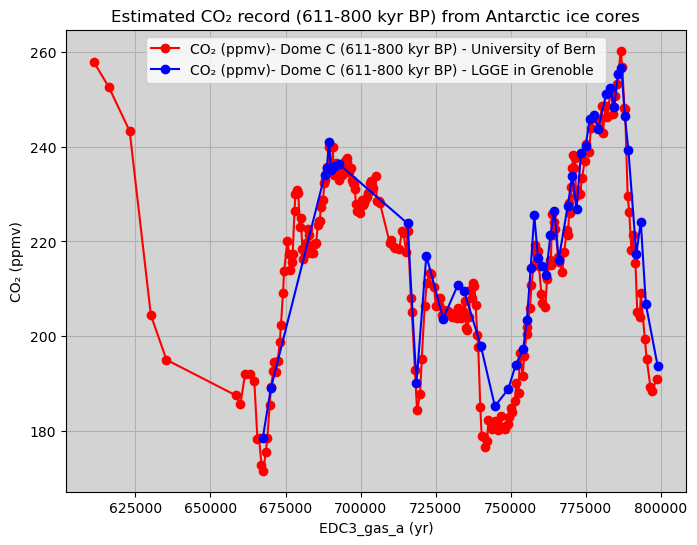

In [4]:
# subscript: https://www.geeksforgeeks.org/how-to-print-superscript-and-subscript-in-python/
# invert x-axis: https://www.delftstack.com/howto/matplotlib/how-to-revert-axes-in-matplotlib/#:~:text=To%20revert%20X-axis%2C%20we%20use%20matplotlib.axes.Axes.invert_xaxis,and%20to%20invert%20Y-axis%20we%20use%20matplotlib.axes.Axes.invert_yaxis.
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df['EDC3_gas_a (yr)'], df['CO2 (ppmv)'], color='red', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - University of Bern ', marker = 'o')
plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='CO\u2082 (ppmv)- Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO\u2082 (ppmv)')
plt.title('Estimated CO\u2082 record (611-800 kyr BP) from Antarctic ice cores')
plt.legend(loc="upper center")
plt.grid(True)
plt.gca().set_facecolor('lightgray')

Import the second tab of data in the excel spreadsheet. This contains results from multiple Antarctic ice core samples - including the data from the first tab (plotted previously)

In [5]:
df2 = pd.read_excel(file_path, sheet_name="2.  Vostok-TD-Dome C", header = 6)
df2.head(1)

Depth (m)  EDC3_gas_a (yr)  CO2 (ppmv)  sigma (ppmv)  Depth (m).1  \
0     102.83            137.0       280.4           1.8        149.1   

   EDC3_gas_a (yr).1  CO2 (ppmv).1  Depth (m).2  \
0               2690         284.7       380.82   

   tentatively synchronized on EDC3_gas_a (yr)  CO2 (ppmv).2  ...  \
0                                      18906.0         190.5  ...   

   Depth (m).4  EDC3_gas_a (yr).3  CO2 (ppmv).4  Depth (m).5  \
0      2700.77           392544.0         259.5      3026.58   

   EDC3_gas_a (yr).4  CO2 (ppmv).5  sigma (ppmv).3  Depth (m).6  \
0           611269.0         257.8             2.1      3061.71   

   EDC3_gas_a (yr).5  CO2 (ppmv).6  
0           667435.0         178.5  

[1 rows x 25 columns]

Plot each data set individually on the same plot. 

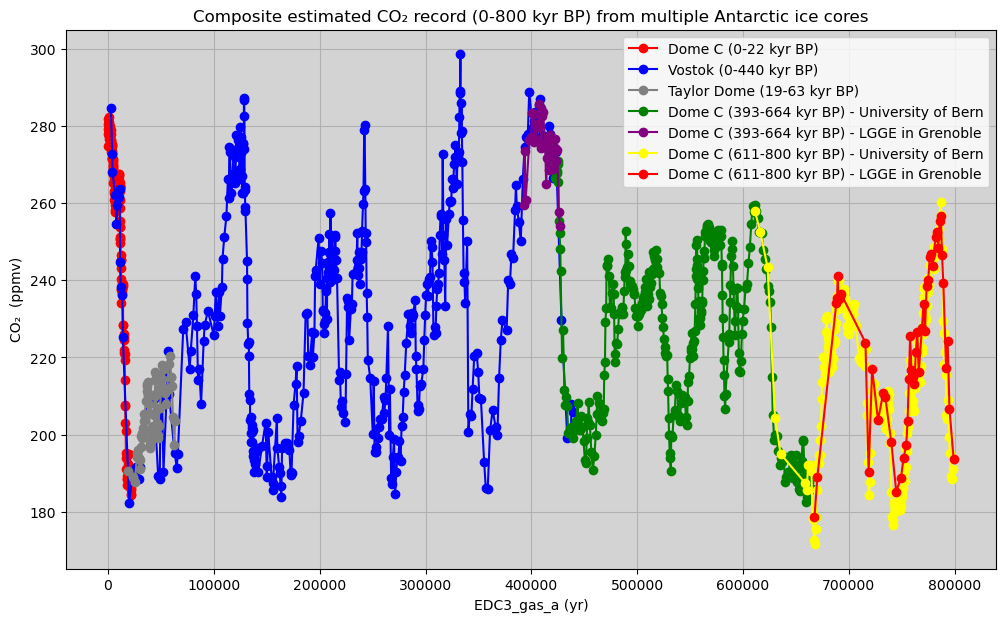

In [6]:
fig, ax = plt.subplots(figsize=(12, 7))
plt.plot(df2['EDC3_gas_a (yr)'], df2['CO2 (ppmv)'], color='red', label='Dome C (0-22 kyr BP)', marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).1'], df2['CO2 (ppmv).1'], color='Blue', label='Vostok (0-440 kyr BP)',marker = 'o')
plt.plot(df2['tentatively synchronized on EDC3_gas_a (yr)'], df2['CO2 (ppmv).2'], color='grey', label='Taylor Dome (19-63 kyr BP)',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).2'], df2['CO2 (ppmv).3'], color='green', label='Dome C (393-664 kyr BP) - University of Bern',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).3'], df2['CO2 (ppmv).4'], color='purple', label='Dome C (393-664 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).4'], df2['CO2 (ppmv).5'], color='yellow', label='Dome C (611-800 kyr BP) - University of Bern',marker = 'o')
plt.plot(df2['EDC3_gas_a (yr).5'], df2['CO2 (ppmv).6'], color='red', label='Dome C (611-800 kyr BP) - LGGE in Grenoble',marker = 'o')
plt.xlabel('EDC3_gas_a (yr)')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple Antarctic ice cores')
plt.legend(loc="upper right")
plt.gca().set_facecolor('lightgray')
plt.grid(True)

Import the composite data set from tab 3 of excel spreadsheet

In [7]:
# Header 
# Composite CO2 record (0-800 kyr BP)	
# 0-22 kyr BP:	Dome C (Monnin et al. 2001) measured at University of Bern
# 22-393 kyr BP:	Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble
# 393-416 kyr BP:	Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble
# 416-664 kyr BP:	Dome C (Siegenthaler et al. 2005)  measured at University of Bern
# 664-800 kyr BP:	Dome C (Luethi et al. (sub)) measured at University of Bern
df_COM = pd.read_excel(file_path, sheet_name="3.  Composite CO2", header = 6)
df_COM.head(2)

EDC3_gas_a (yr)  CO2 (ppmv)
0              137       280.4
1              268       274.9

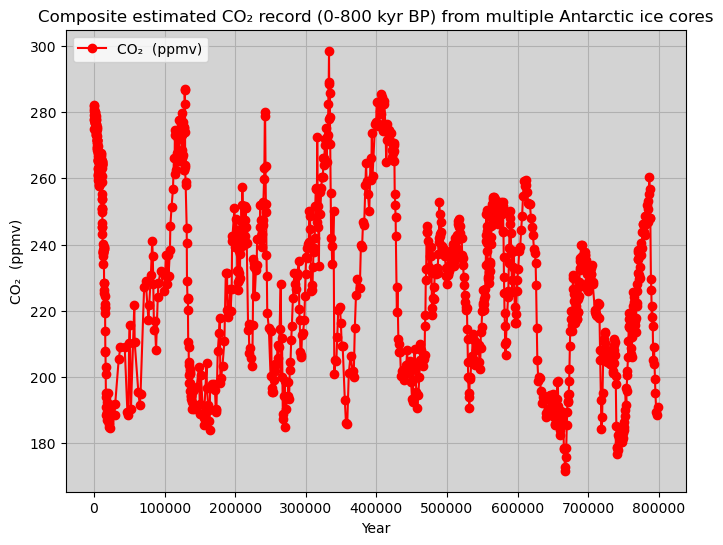

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='red', label='CO\u2082  (ppmv)', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple Antarctic ice cores')
plt.legend(loc="upper left")
plt.gca().set_facecolor('lightgray')
plt.grid(True)

### Import CO2 data from IPCC Report



Bereiter, B., Eggleston, S., Schmitt, J., Nehrbass-Ahles, C., Stocker, T. F., Fischer, H., Kipfstuhl, S., and Chappellaz, J. (2015), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophys. Res. Lett., 42, 542–549, doi:10.1002/2014GL061957.




[4]  https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter01_SM.pdf

In [9]:
# Composite CO2 record (0-800 kyr BP)	
# -51-1800 yr BP:'	Law Dome (Rubino et al., 2013)
# 1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)
# 2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)
# 11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)
# 22-40 kyr BP:	Siple Dome (Ahn et al., 2014)
# 40-60 kyr BP:	TALDICE (Bereiter et al., 2012)
# 60-115 kyr BP:	EDML (Bereiter et al., 2012)
# 105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)
# 155-393 kyr BP:	Vostok (Petit et al., 1999)
# 393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)
# 612-800 kyr BP:	Dome C (Bereiter et al., 2014)
# Gasage: AICC2012 (Bazin et al., 2013) except for Law Dome, WAIS and Siple Dome (see text for more details).	
# Sigma: Where no individual sigma is given, we use average for system/record.	
relative_path2 = "data\\project2\\grl52461-sup-0003-supplementary.xls"
# Join the two 
file_path = os.path.join(current_directory, relative_path2)
df_IPCC = pd.read_excel(file_path, sheet_name="CO2 Composite", header = 14)
df_IPCC.describe()
df_IPCC.isnull().sum()

Gasage (yr BP)           0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64

There was something strange going on with the column headings in this data set. Kept causing error when plotting. I think there was extra characters. Use .str.strip() to remove. 

In [10]:
df_IPCC.columns = df_IPCC.columns.str.strip()
df_IPCC.columns

Index(['Gasage (yr BP)', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')

Plot the IPCC data set 

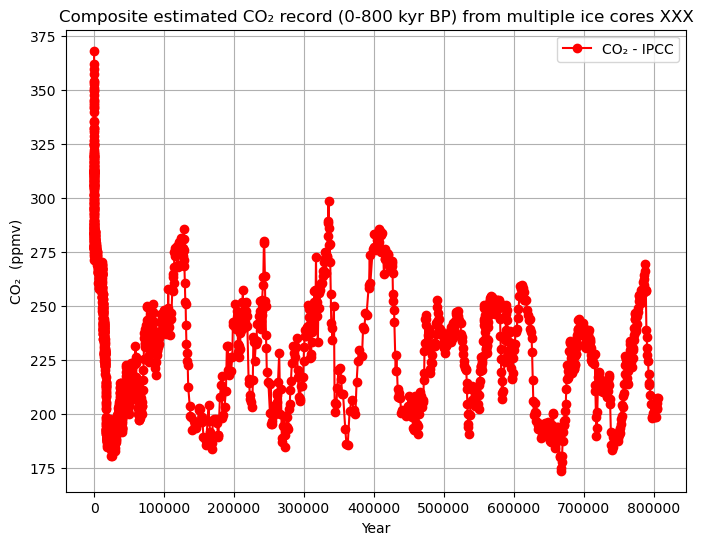

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082 - IPCC', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores XXX')
plt.legend(loc="upper right")
plt.grid(True)

Compare the IPCC data set with the data presented in Luthi et al Nature paper. 

IPCC data set contains - 
Blurb from data set README file 

Composite of atmospheric CO2 records from Antarctic ice cores

Reference:
Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.
For details about the improvements relative to the previous version see supplementary information of the main article.
For detailed references of all records collected in this file also refer to the supplemetary information of the main article.
For latest anthropogenic data refer to NOAA/Mauna Loa record.
Age unit is in years before present (yr BP) whereas present refers to 1950.

Note, not all records shown in sheet "all records" are part of the composite. 
If millennial scale or smaller details of the composite are studied, we recommend to look into all records available for that period and not only in the composite.


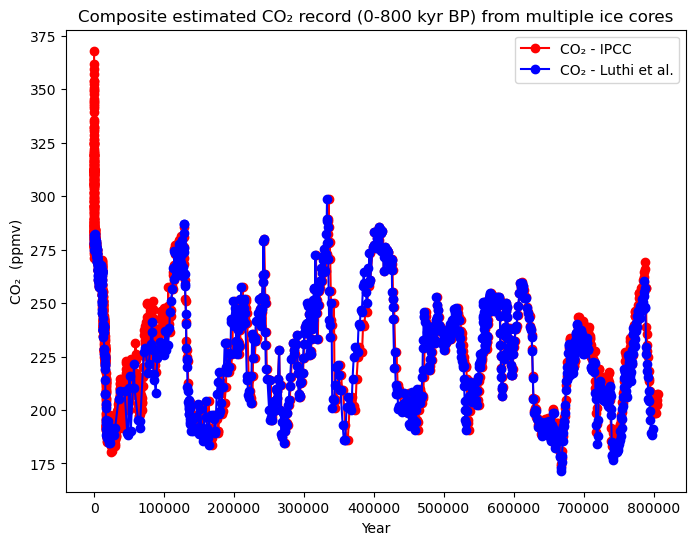

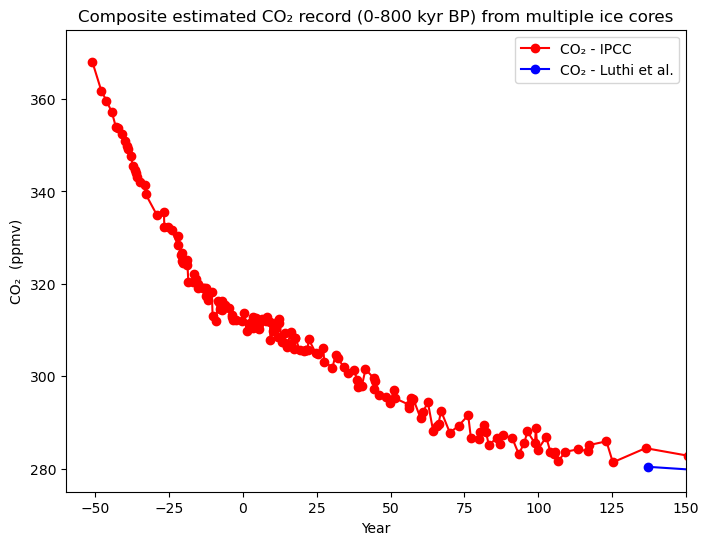

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082 - IPCC', marker = 'o')
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores')
plt.legend(loc="upper right")
plt.show()
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='red', label='CO\u2082 - IPCC', marker = 'o')
plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('CO\u2082  (ppmv)')
plt.title('Composite estimated CO\u2082 record (0-800 kyr BP) from multiple ice cores')
plt.legend(loc="upper right")
plt.xlim(- 60 , 150)
plt.ylim(275 , 375)
plt.show()


### Temperature Data from Jouzel - epicaDC.deuttemp.EDC3-AICC 

In [13]:
relative_path3 = "data\\project2\\epicaDC.deuttemp.EDC3-AICC.xls"
file_path3 = os.path.join(current_directory, relative_path3)
df_temp1 = pd.read_excel(file_path3, sheet_name="epicaDC.deuttemp.EDC3-AICC.txt", header = 0)
df_temp1.head(1)

bag  ztop  EDC3béta  AICC2012  deutfinal   temp  acc-EDC3beta
0    1   0.0     -50.0     -55.0        NaN  218.3      3.105321

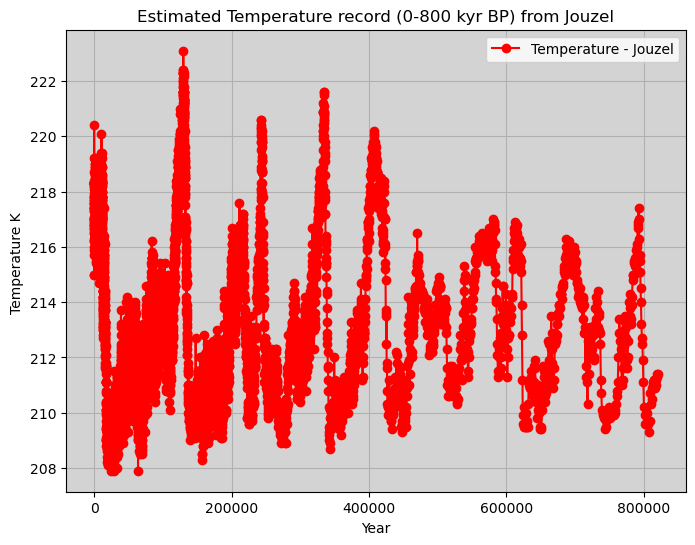

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temperature - Jouzel', marker = 'o')
#plt.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
#plt.plot(df['EDC3_gas_a (yr).1'], df['CO2 (ppmv).1'], color='Blue', label='House Prices (from price index)',marker = 'o')
plt.xlabel('Year')
plt.ylabel('Temperature K ')
plt.title('Estimated Temperature record (0-800 kyr BP) from Jouzel')
plt.legend(loc="upper right")
plt.grid(True)
plt.gca().set_facecolor('lightgray')

PLot Jouzel temperature data against the composite data from Luthi et al. 
- Note: i've also inverted the x-axis as i find it counter intuitive to have past time going to the right..

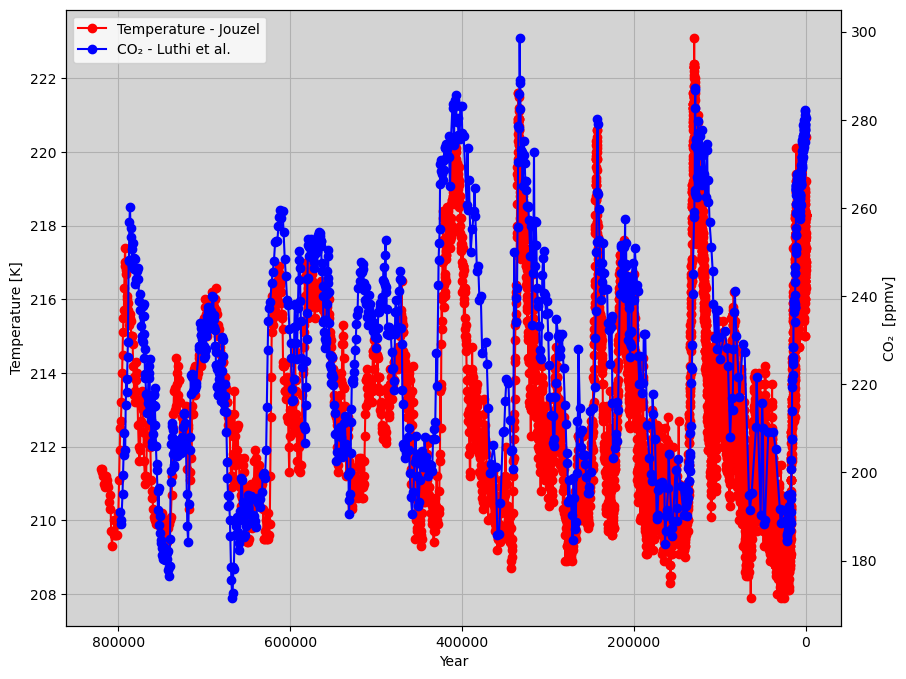

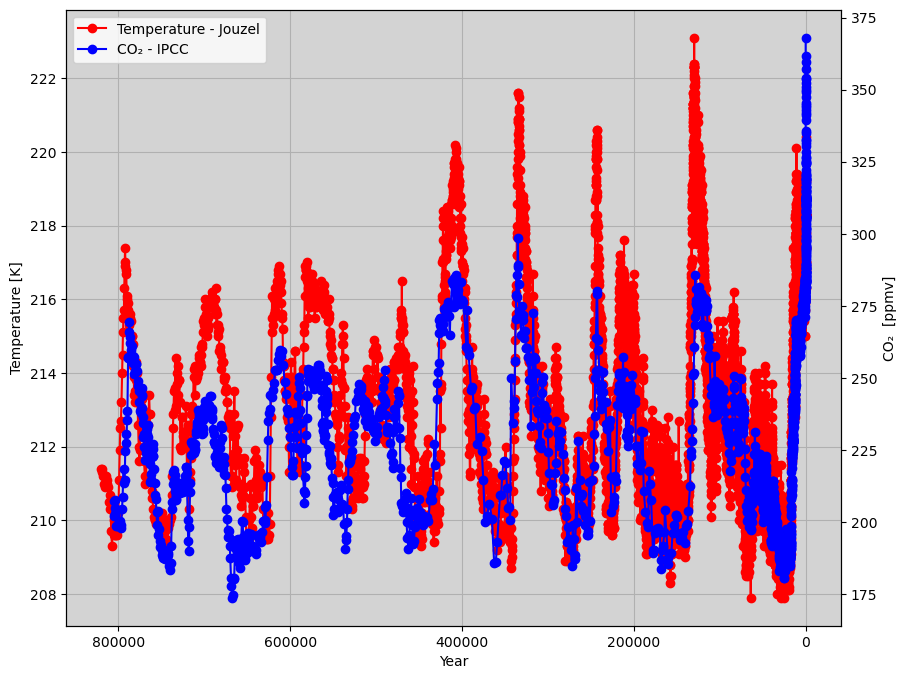

In [15]:
#all labels on one legend:  https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend
# arguement for fig.add_subplot: https://stackoverflow.com/questions/3584805/what-does-the-argument-mean-in-fig-add-subplot111
# invert x-axis: https://www.delftstack.com/howto/matplotlib/how-to-revert-axes-in-matplotlib/#:~:text=To%20revert%20X-axis%2C%20we%20use%20matplotlib.axes.Axes.invert_xaxis,and%20to%20invert%20Y-axis%20we%20use%20matplotlib.axes.Axes.invert_yaxis.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temperature - Jouzel', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('EDC3_gas_a [yr]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.set_facecolor('lightgray')
ax.invert_xaxis()
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp1['EDC3béta'], df_temp1['temp'], color='red', label='Temperature - Jouzel', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('EDC3_gas_a [yr]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.set_facecolor('lightgray')
ax.invert_xaxis()
plt.show()

Temperature Data from NOAA 

filename edc3deuttemp2007.txt - changed to NOAA.csv 

this is the same data as reported by Jouzel et al. however the temperature estimates have been updated.. 
 


text file header..

EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates
-----------------------------------------------------------------------
               World Data Center for Paleoclimatology, Boulder
                                  and
                     NOAA Paleoclimatology Program
-----------------------------------------------------------------------
NOTE: PLEASE CITE CONTRIBUTORS WHEN USING THIS DATA!!!!!


NAME OF DATA SET: 
EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates

LAST UPDATE: 11/26/2007 (Replaced age model. This file now includes EDC3 
age model.  Previous version of this file dated 10/16/2007 erroneously 
included the older EDC1-EDC2 age model)

CONTRIBUTOR: Valérie Masson-Delmotte, LSCE/IPSL 
IGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2007-091

SUGGESTED DATA CITATION: Jouzel, J., et al.  2007.
EPICA Dome C Ice Core 800KYr Deuterium Data and Temperature Estimates. 
IGBP PAGES/World Data Center for Paleoclimatology 
Data Contribution Series # 2007-091.
NOAA/NCDC Paleoclimatology Program, Boulder CO, USA.


ORIGINAL REFERENCE:
Jouzel, J., V. Masson-Delmotte, O. Cattani, G. Dreyfus, S. Falourd, 
G. Hoffmann, B. Minster, J. Nouet, J.M. Barnola, J. Chappellaz, H. Fischer,
J.C. Gallet, S. Johnsen, M. Leuenberger, L. Loulergue, D. Luethi, H. Oerter,
F. Parrenin, G. Raisbeck, D. Raynaud, A. Schilt, J. Schwander, E. Selmo, 
R. Souchez, R. Spahni, B. Stauffer, J.P. Steffensen, B. Stenni, T.F. Stocker, 
J.L. Tison, M. Werner, and E.W. Wolff.  2007.
Orbital and Millennial Antarctic Climate Variability over the Past 800,000 Years.
Science, Vol. 317, No. 5839, pp.793-797, 10 August 2007.

ABSTRACT:
A high-resolution deuterium profile is now available along the entire 
European Project for Ice Coring in Antarctica Dome C ice core, extending 
this climate record back to marine isotope stage 20.2, ~800,000 years ago. 
Experiments performed with an atmospheric general circulation model 
including water isotopes support its temperature interpretation. 
We assessed the general correspondence between Dansgaard-Oeschger 
events and their smoothed Antarctic counterparts for this Dome C record, 
which reveals the presence of such features with similar amplitudes 
during previous glacial periods. We suggest that the interplay between 
obliquity and precession accounts for the variable intensity of 
interglacial periods in ice core records.


GEOGRAPHIC REGION: Antarctica
PERIOD OF RECORD:  803 KYrBP - present

FUNDING SOURCES: 
EPICA is funded by the EU and by national contributions from Belgium, 
Denmark, France, Germany, Italy, The Netherlands, Norway, Sweden, 
Switzerland, and the UK.  This work has in particular benefited from 
the support of EPICA-MIS of the European 6th framework and Agence 
Nationale de la Recherche (ANR), Integration des Constraintes
Paléoclimatiques pour Réduire les Incertitudes sur l’Evolution du 
Clìmat pendant les Périodes Chaudes (PICC). The main logistic support 
was provided by Institut Polaire Français Paul-Emile Victor and
Programma Nazionale Ricerche in Antartide (at Dome C)and 
Alfred Wegener Institute (at Dronning Maud Land).


DESCRIPTION:  
High-resolution (55cm.) deuterium (dDice) profile from the EPICA Dome C Ice Core, 
Antarctica (75º 06' S, 123º 21' E), with an optimal accuracy of ± 0.5 ‰ (1 sigma), 
from the surface down to 3259.7 m.




DATA:
EPICA Dome C bag deuterium data 
(LSCE, analytical accuracy of 0.5 per mille)

Temperature estimated after correction for sea-water 
isotopic composition (Bintanja et al, 2005)
and for ice sheet elevation (Parrenin et al, 2007) 
on EDC3 age scale (Parrenin et al, 2007)


Column 1: Bag number (55 cm sample)
Column 2: Top depth (m)
Column 3: EDC3 age scale (years before year 1950)
Column 4: dD data (per mille with respect to SMOW)
Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)

In [16]:
relative_path4 = "data\\project2\\NOAA.csv"
file_path4 = os.path.join(current_directory, relative_path4)
df_temp2 = pd.read_csv(file_path4)
df_temp2.head(30)
df_temp2.isnull().sum()

Bag            4801
ztop              0
Age               0
Deuterium        12
Temperature      15
dtype: int64

In [17]:
df_temp2.describe()

Bag         ztop            Age    Deuterium  Temperature
count  999.000000  5800.000000    5800.000000  5788.000000  5785.000000
mean   500.000000  1594.725000  190016.390617  -417.579610    -4.580228
std    288.530761   920.953062  192546.207239    20.359332     3.446971
min      1.000000     0.000000     -50.000000  -449.500000   -10.580000
25%    250.500000   797.362500   46330.569350  -432.500000    -7.450000
50%    500.000000  1594.725000  121793.340000  -421.300000    -5.200000
75%    749.500000  2392.087500  272456.740000  -403.200000    -1.820000
max    999.000000  3189.450000  801662.000000     0.950000     5.460000

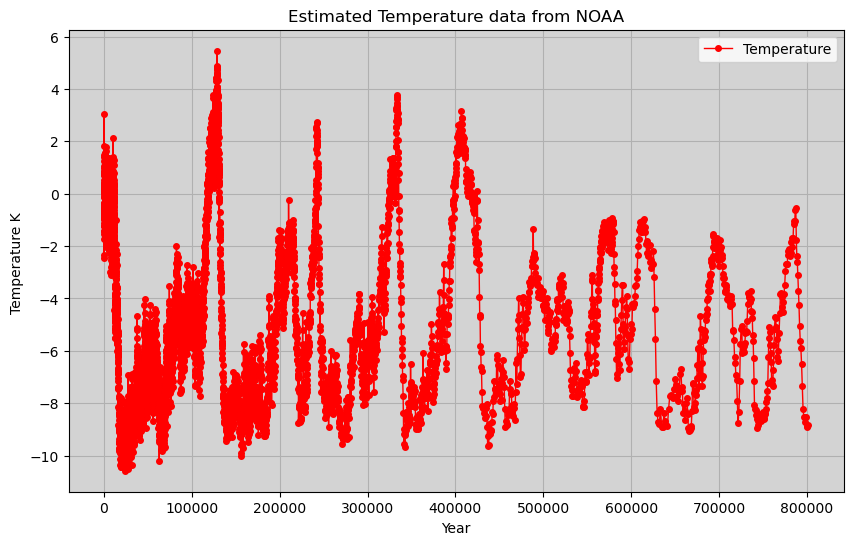

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature', marker = 'o', markersize=4, linewidth=1,)
plt.xlabel('Year')
plt.gca().set_facecolor('lightgray')
plt.ylabel('Temperature K ')
plt.title('Estimated Temperature data from NOAA')
plt.legend(loc="upper right")
plt.grid(2)

Compare the updated temperature from NOAA with the CO2 data from IPCC

- these are the two data sets for Temperature and CO2 we will be using going forward. 

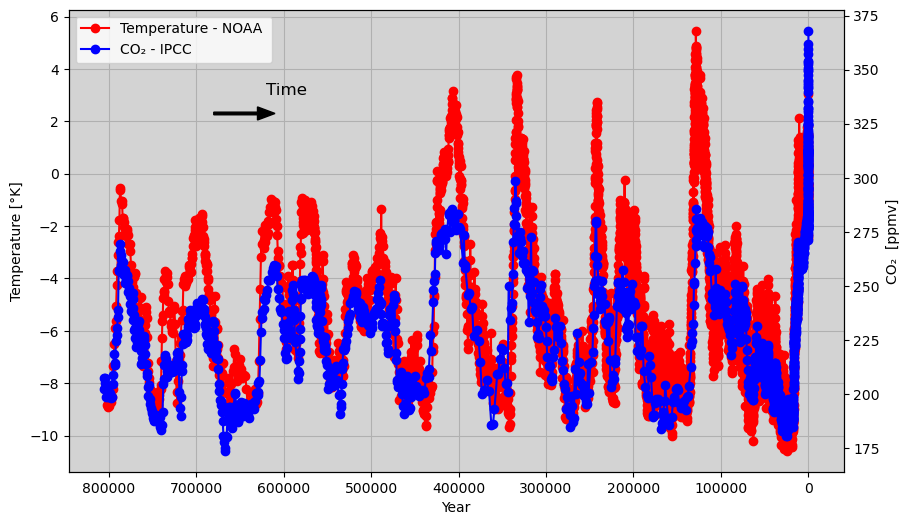

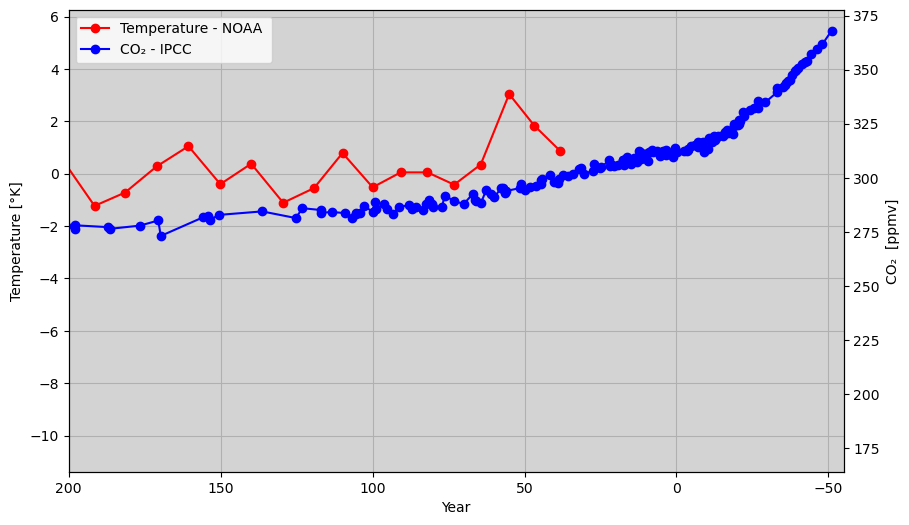

In [19]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
#plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.annotate('Time ', xy=(620000,3), fontsize=12,)
ax.arrow(680000, 2.3, -50000, 0, color = 'black', width = 0.1, head_length = 20000, head_width = 0.5)
ax.invert_xaxis()
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
#plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 

ax.set_xlim(-55, 200)
ax.invert_xaxis()
plt.show()


## Methane (CH4) data set 

Data on the changes in atmospheric CH4 over the past 800,000 years was presented by Loulergue et al. [1] in Nature 

The file contains Supplementary Table can be found here: https://www.nature.com/articles/nature06950#MOESM32.

This file provides the CH4 data of the last 800,000 years from the EPICA Dome C ice core. The CH4 concentrations are listed against depth and the corresponding EDC3_gas_a age. (XLS 270 kb)




[1] Loulergue, L., Schilt, A., Spahni, R. et al. Orbital and millennial-scale features of atmospheric CH4 over the past 800,000 years. Nature 453, 383–386 (2008). https://doi.org/10.1038/nature06950



Import data set from excel spreadsheet: 41586_2008_BFnature06950_MOESM33_ESM.xls

In [20]:
# file header 
#Part of the EDC96 data is published in Monnin et al., 2001, Flückiger et al., 2002 and Spahni et al., 2003, Spahni et al. 2005
#and EDC99 data in Spahni et al. 2005
#All the new data are published in Loulergue et al., Nature, 2008
#The EDC3_gas_a age scale is detailed in Loulergue et al., 2007 (Climate of the Past) and is available on NOAA-NCDC database with ice chronology (Parrenin et al., 2007)
#Mean value are given for all the samples with <5cm of depth differences
#*******************************************************************************************
#All data (Grenoble and Bern, Grenoble data are corrected by +6 ppbv, to be coherent with the Bern dataset):
relative_path5 = "data\\project2\\41586_2008_BFnature06950_MOESM33_ESM.xls"
file_path5 = os.path.join(current_directory, relative_path5)
df_CH4 = pd.read_excel(file_path5, sheet_name="CH4_EDC", header = 18)
df_CH4.head(1)
df_CH4.tail(1)
#df_CH4.describe()

EDC1999 depth [m]  gas age (edc3_gas_a) [yrs BP 1950]  CH4 mean [ppbv]  \
2102           3190.525                            799396.1            399.3   

      1 s uncertainty [ppbv] Bern, Grenoble [b, g]  
2102                    10.0                     g

Plot Methane data 

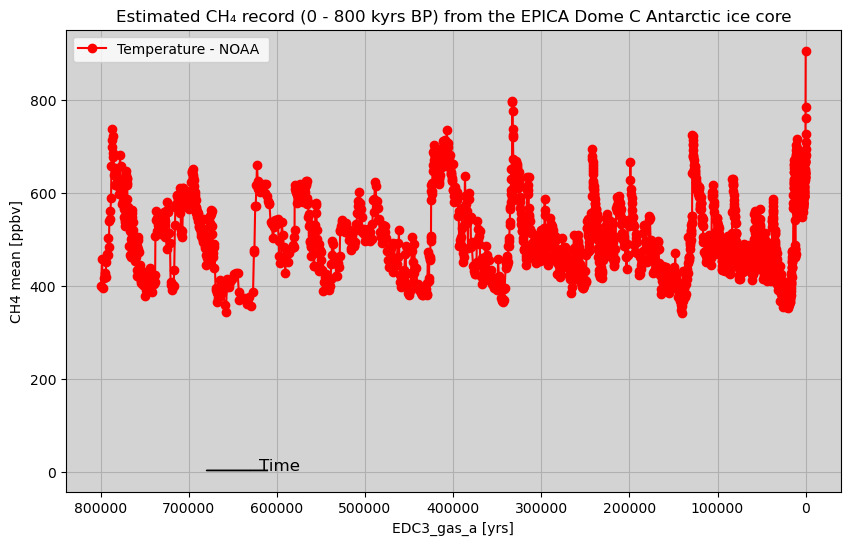

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]'], df_CH4['CH4 mean [ppbv]'], color='red', label='CH4 mean [ppbv]', marker = 'o')
ax.set_xlabel('EDC3_gas_a [yrs]')
ax.set_ylabel('CH4 mean [ppbv]')
#
ax.legend(lns1, labs, loc='upper left')
ax.set_facecolor('lightgray')
ax.grid(True) 
ax.annotate('Time ', xy=(620000,3), fontsize=12,)
ax.arrow(680000, 2.3, -50000, 0, color = 'black', width = 0.1, head_length = 20000, head_width = 0.5)
ax.invert_xaxis()
ax.set_title('Estimated CH\u2084 record (0 - 800 kyrs BP) from the EPICA Dome C Antarctic ice core')
plt.show()


Now we have 3 data sets for CO2, CH4 and temperature which extends back 800,000 years. The next step is to determine the time period and sampling interval for them.. and get the data into one dataframe. 

The sampling interval for the 3 data sets is very different. I guess its not possible to measure the CO2, CH4 composition and the estimate temperature on the same sample? that would be more useful. 

- the temperature dataset from NOAA - ``df_temp2`` has 5800 time stamped data points with time extending from (-50) to 801662 BP (1950)  

- the CO2 data from the IPCC - ``df_IPCC`` has 1901 time points from - 50.03 to 805668.868405 BP (1950)

- the CH4 data has - ``df_CH4`` has 2103 time points from 13.4 to 799396.1  BP (1950)

the start and end points of the 3 data sets are different and the sampling interval is really inconsistent with time intervals ranging from a few hundred to several thousand years.

Need to interpolate the data and resample with a fixed interval. Then trunate the data set to align the start and end points. 

start point - the CH4 defines the data start point. Lets simply set it to 800,000 year BP (1950)
End point - again CH4 defines the data end point. Let's set it as 0 years BP (1950), therefore 1935. 

and sample every 100 years? 50 years ? 

Will need to splice with some morndern data sets as well.  

In [22]:
# create a new column that contains DeltaT for each data set. 
df_temp2['delta'] = df_temp2['Age'].diff()
df_IPCC['delta'] =df_IPCC['Gasage (yr BP)'].diff()
df_CH4['delta'] =df_CH4['gas age (edc3_gas_a) [yrs BP 1950]'].diff()

Plot up the deltaT column as a histogram 

(0.0, 2000.0)

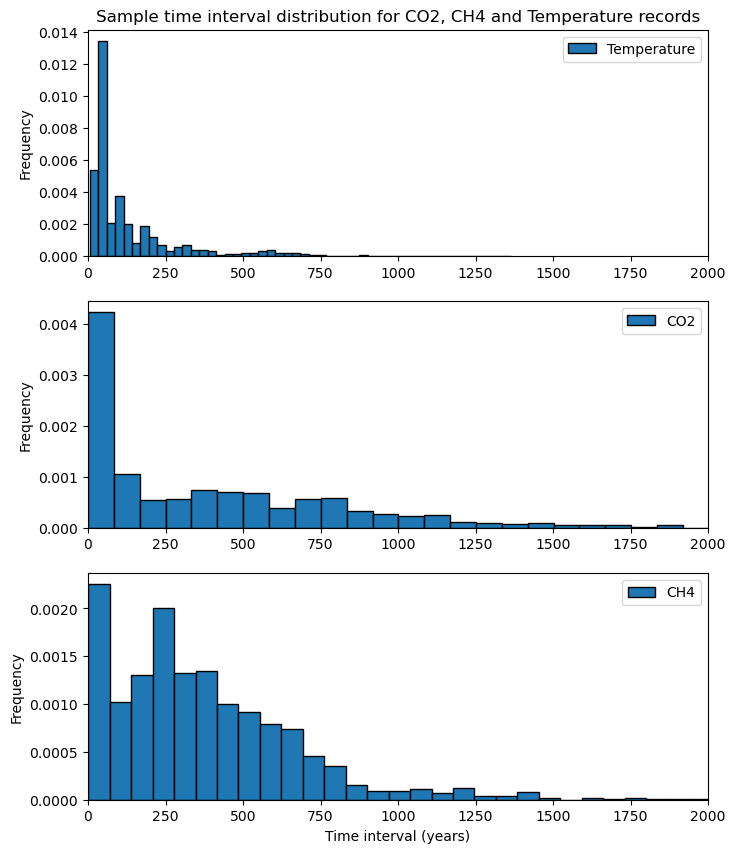

In [23]:
fig, ax = plt.subplots(3, 1, figsize=(8, 10))
ax[0].hist(df_temp2['delta'], bins = 50,  density=True, label='Temperature', edgecolor='black')
ax[0].set_title('Sample time interval distribution for CO2, CH4 and Temperature records')
ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Bill length [mm]')
ax[0].set_ylabel('Frequency')
ax[0].set_xlim(0,2000)

ax[1].hist(df_IPCC['delta'], bins = 50, density=True, label='CO2', edgecolor='black')
#ax[1].set_title('Bill length distribution (in mm) for Penguin species')
ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Bill length [mm]')
ax[1].set_ylabel('Frequency')
ax[1].set_xlim(0,2000)

ax[2].hist(df_CH4['delta'], bins = 50,  density=True, label='CH4', edgecolor='black')
#ax[2].set_title('Bill length distribution (in mm) for Penguin species')
ax[2].legend(loc='upper right')
ax[2].set_xlabel('Time interval (years)')
ax[2].set_ylabel('Frequency')
ax[2].set_xlim(0,2000)

The sample time interval varies quite a bit between in each data set and between dataset. 

therefore to harmonise the data, we need to interpolate then resmaple to a fixed time interval with the same start and end points. 






In interpolation methods, 'polynomial' generally means that you generate a polynomial with the same number of coefficients as you have data points. So, for 10 data points you would get an order 9 polynomial.

'cubic' generally means piecewise 3rd order polynomials. A sliding window of 4 data points is used to generate these cubic polynomials. This is more appropriate for our data set. 


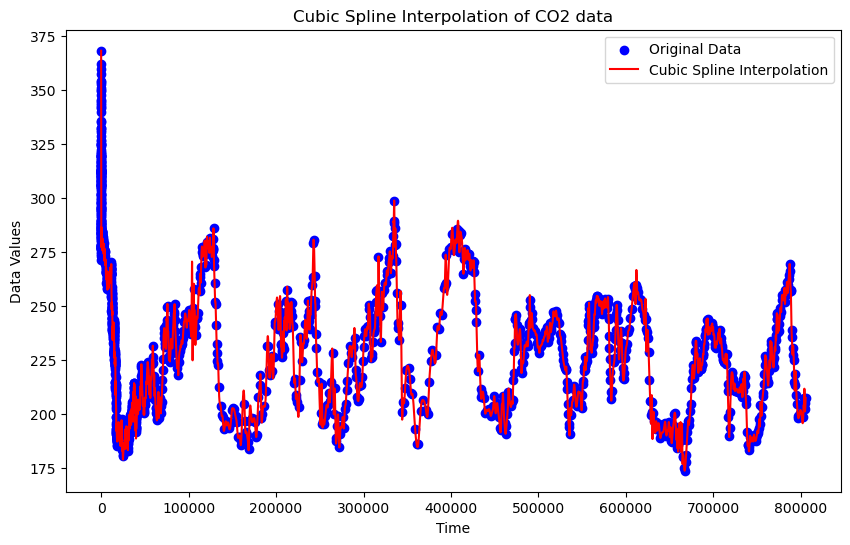

In [24]:

# cubic or polynominal interpolation: https://stackoverflow.com/questions/57796327/pandas-interpolation-method-cubic-spline-or-polynomial?rq=3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline

# cubic spline interpolation on the 
spline_IPCC = CubicSpline(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)']) 

# Generate points for the interpolated curve - time 
inter_points = np.linspace(min(df_IPCC['Gasage (yr BP)']), max(df_IPCC['Gasage (yr BP)']), 8000)
inter_IPCC = spline_IPCC(inter_points)

# new time range for data 
new_time = np.arange(0, 800000 + 100, 100)
resampled_values = np.interp(new_time, inter_points, inter_IPCC)

# Create a new DataFrame to store the resampled data
resampled_df_IPCC = pd.DataFrame({'Time': new_time, 'CO2': resampled_values})

# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], label='Original Data', color='blue')
plt.plot(inter_points, inter_IPCC, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic Spline Interpolation of CO2 data')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.legend()
plt.show()

In [25]:
resampled_df_IPCC

Time         CO2
0          0  330.502197
1        100  288.681895
2        200  284.843133
3        300  281.803361
4        400  279.705751
...      ...         ...
7996  799600  201.691385
7997  799700  201.703295
7998  799800  201.690889
7999  799900  201.653916
8000  800000  201.592128

[8001 rows x 2 columns]

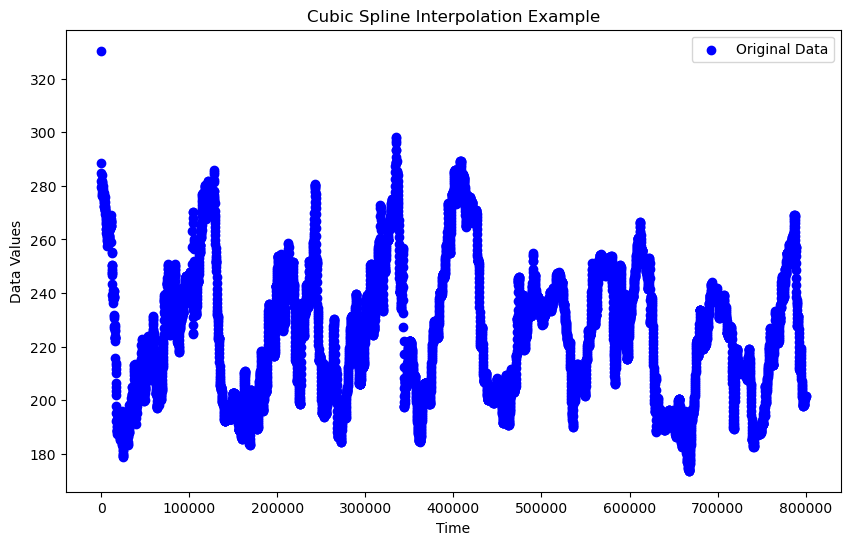

In [26]:
# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(resampled_df_IPCC['Time'], resampled_df_IPCC['CO2'], label='Original Data', color='blue')
#plt.plot(inter_points, inter_IPCC, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic Spline Interpolation Example')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.legend()
plt.show()

In [27]:
df_temp2['Age']
df_temp2['Temperature']

df_temp2_cleaned = df_temp2.dropna(subset=['Temperature'])
df_temp2_cleaned

Bag     ztop           Age  Deuterium  Temperature       delta
12    13.0     6.60      38.37379    -390.90         0.88     7.76566
13    14.0     7.15      46.81203    -385.10         1.84     8.43824
14    15.0     7.70      55.05624    -377.80         3.04     8.24421
15    16.0     8.25      64.41511    -394.10         0.35     9.35887
16    17.0     8.80      73.15077    -398.70        -0.42     8.73566
...    ...      ...           ...        ...          ...         ...
5795   NaN  3187.25  797408.00000    -440.20        -8.73   959.00000
5796   NaN  3187.80  798443.00000    -439.00        -8.54  1035.00000
5797   NaN  3188.35  799501.00000    -441.10        -8.88  1058.00000
5798   NaN  3188.90  800589.00000    -441.42        -8.92  1088.00000
5799   NaN  3189.45  801662.00000    -440.90        -8.82  1073.00000

[5785 rows x 6 columns]

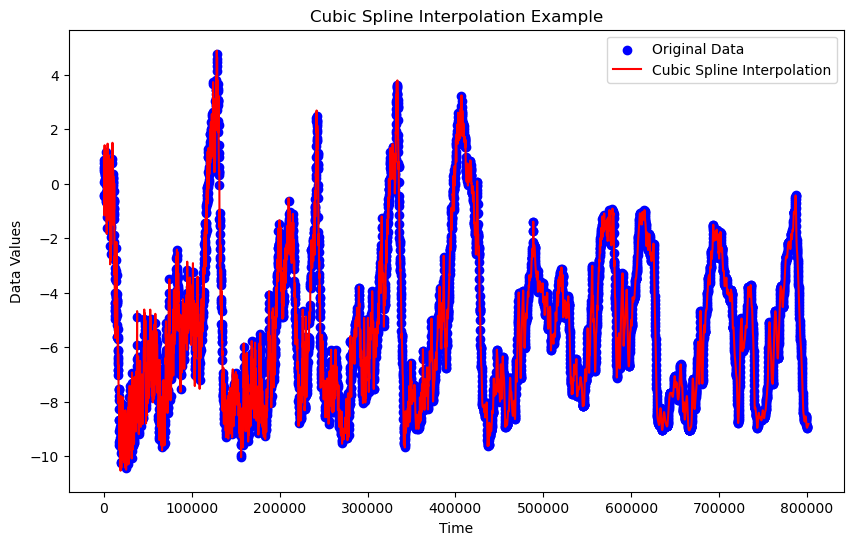

In [28]:

# cubic or polynominal interpolation: https://stackoverflow.com/questions/57796327/pandas-interpolation-method-cubic-spline-or-polynomial?rq=3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline


# cubic spline interpolation on the 
spline_NOAA = CubicSpline(df_temp2_cleaned['Age'], df_temp2_cleaned['Temperature']) 

# Generate points for the interpolated curve - time 
inter_points = np.linspace(min(df_temp2_cleaned['Age']), max(df_temp2_cleaned['Age']), 8000)
inter_NOAA = spline_NOAA(inter_points)

# new time range for data 
new_time = np.arange(0, 800000 + 100, 100)
resampled_values = np.interp(new_time, inter_points, inter_NOAA)

# Create a new DataFrame to store the resampled data
resampled_df_temp = pd.DataFrame({'Time': new_time, 'Temp': resampled_values})

# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(resampled_df_temp['Time'], resampled_df_temp['Temp'], label='Original Data', color='blue')
plt.plot(inter_points, inter_NOAA, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic Spline Interpolation Example')
plt.xlabel('Time')
plt.ylabel('Data Values')
plt.legend()
plt.show()


In [29]:
resampled_df_temp

Time      Temp
0          0  0.880000
1        100  0.532010
2        200  0.609043
3        300  0.049773
4        400 -0.414306
...      ...       ...
7996  799600 -8.905143
7997  799700 -8.925387
7998  799800 -8.940134
7999  799900 -8.949870
8000  800000 -8.955080

[8001 rows x 2 columns]

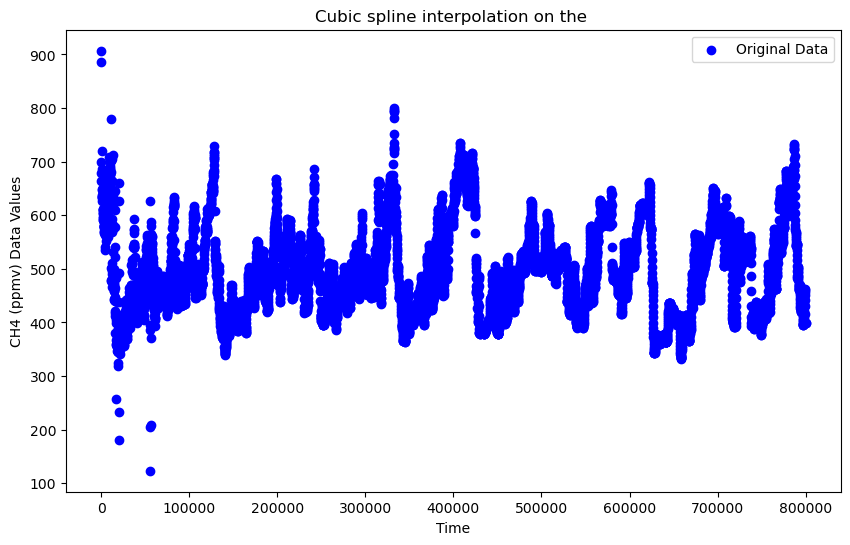

In [30]:
# cubic or polynominal interpolation: https://stackoverflow.com/questions/57796327/pandas-interpolation-method-cubic-spline-or-polynomial?rq=3
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.interpolate.html


# cubic spline interpolation on the CH4 data 
spline_CH4 = CubicSpline(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]'], df_CH4['CH4 mean [ppbv]']) 

# Generate points for the interpolated curve - time 
inter_points = np.linspace(min(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]']), max(df_CH4['gas age (edc3_gas_a) [yrs BP 1950]']), 8000)
inter_CH4 = spline_CH4(inter_points)

# new time range for data 
new_time = np.arange(0, 800000 + 100, 100)
resampled_values = np.interp(new_time, inter_points, inter_CH4)

# Create a new DataFrame to store the resampled data
resampled_df_CH4 = pd.DataFrame({'Time': new_time, 'CH4': resampled_values})

# Plot the original data and the interpolated curve
plt.figure(figsize=(10, 6))
plt.scatter(resampled_df_CH4['Time'], resampled_df_CH4['CH4'], label='Original Data', color='blue')
#plt.plot(inter_points, inter_N, label='Cubic Spline Interpolation', color='red')
plt.title('Cubic spline interpolation on the ')
plt.xlabel('Time')
plt.ylabel('CH4 (ppmv) Data Values')
plt.legend()
plt.show()


Let's merge these three 

In [31]:
#resampled_df_IPCC = pd.DataFrame({'Time': pd.date_range('2022-01-01', '2022-01-05'), 'Values_A': [1, 2, 3, 4, 5]})
#resampled_df_temp = pd.DataFrame({'Time': pd.date_range('2022-01-03', '2022-01-07'), 'Values_B': [10, 20, 30, 40, 50]})

# Merge based on the 'Time' column
merged_df = pd.merge(resampled_df_IPCC, resampled_df_temp,  on='Time', how='inner')
merged_df = pd.merge(merged_df, resampled_df_CH4,  on='Time', how='inner')

merged_df.set_index('Time', inplace=True)
merged_df

CO2      Temp         CH4
Time                                    
0       330.502197  0.880000  907.000000
100     288.681895  0.532010  885.738147
200     284.843133  0.609043  699.643309
300     281.803361  0.049773  664.083072
400     279.705751 -0.414306  678.185507
...            ...       ...         ...
799600  201.691385 -8.905143  399.300000
799700  201.703295 -8.925387  399.300000
799800  201.690889 -8.940134  399.300000
799900  201.653916 -8.949870  399.300000
800000  201.592128 -8.955080  399.300000

[8001 rows x 3 columns]

### 6. Export dataframe to csv and json 

In [32]:
#https://pythonguides.com/python-dataframe-to-csv/


# export the DataFrame to a CSV file
merged_df.to_csv('climate_data.csv', index=True)




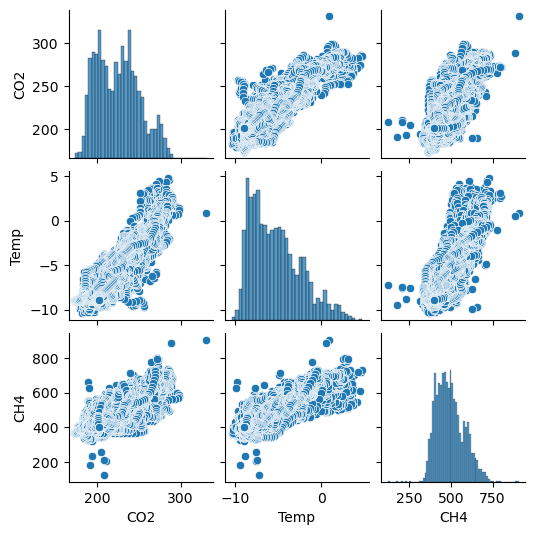

In [33]:
g = sns.pairplot(merged_df, height=1.8)

<Axes: >

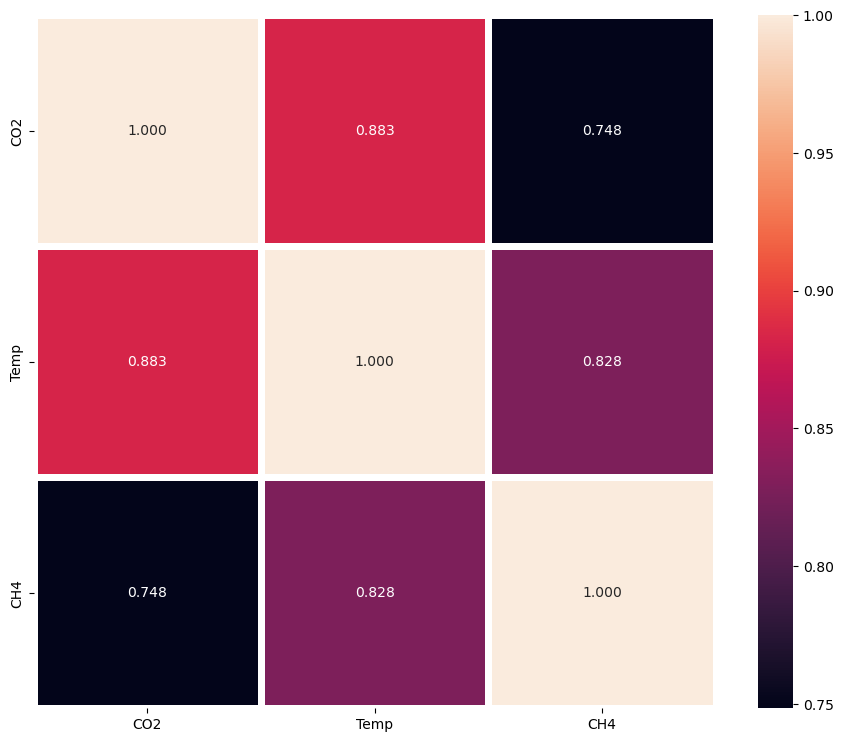

In [34]:
plt.figure(figsize=(11, 9))
sns.heatmap(merged_df.corr(), annot=True, linewidth=5,fmt='.3f')

Lets looks at the different periods a bit closer 

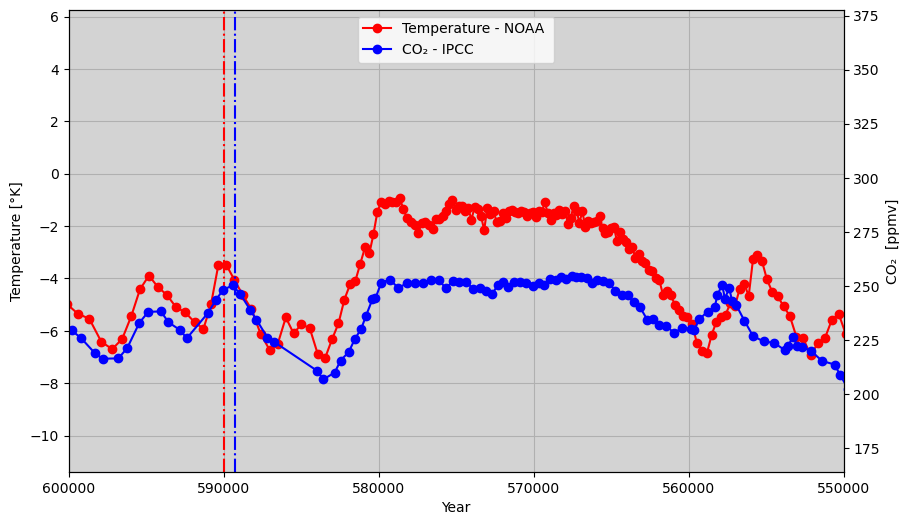

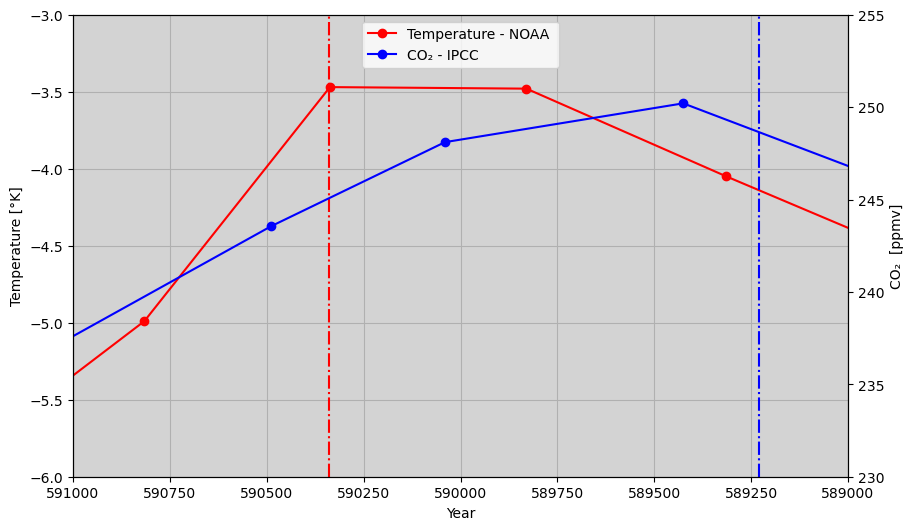

In [35]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(550000, 600000)
ax.axvline(x=590000, linestyle='-.', color='red', label='Vertical Line')
ax.axvline(x=589300, linestyle='-.', color='blue', label='Vertical Line')
ax.invert_xaxis()

plt.show()
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_IPCC['Gasage (yr BP)'], df_IPCC['CO2 (ppmv)'], color='blue', label='CO\u2082 - IPCC', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax2.set_ylim(230, 255)
ax.grid(True) 
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(589000, 591000)
ax.set_ylim(-6, -3)
ax.axvline(x=590340, linestyle='-.', color='red', label='Vertical Line')
ax.axvline(x=589230, linestyle='-.', color='blue', label='Vertical Line')
ax.invert_xaxis()
plt.show()

On first glance the data looks very compelling with temperature tracking with the CO2 level. However I have noticed some inconsistencies/anomalies. That perhaps can be explained by some paleoclimate expert. 

If we assume that temperature should temporally lag CO2 levels, when we look at the period from 550 k - 600 k above, there seems to be a few inconsistencies. For instance, ~ 590000 BP the temperature stops increaesing despite increasing CO2 levels (red dashed line). The CO2 levels peak 700 years later (blue dashed line) and at this point the tempera 

(400000.0, -1000.0)

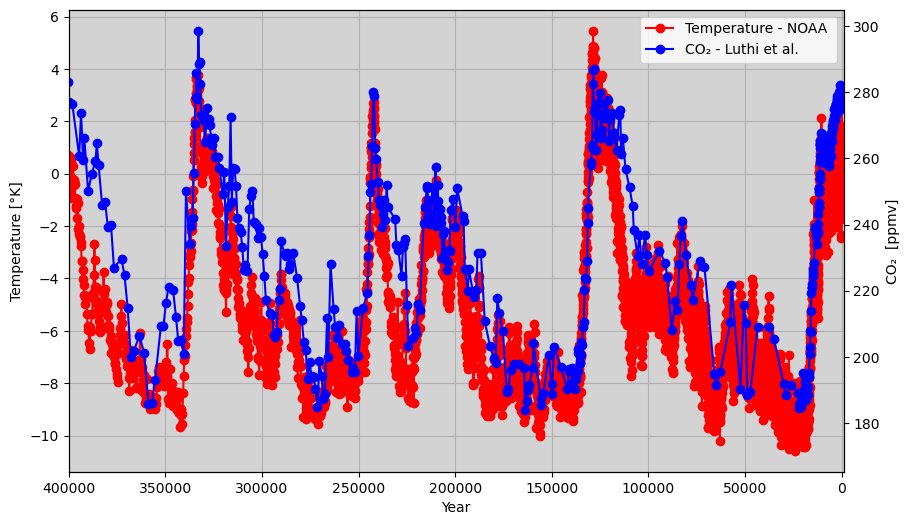

In [36]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature - NOAA ', marker = 'o')

ax.set_xlabel('Year')
ax.set_ylabel('Temperature [\u00B0K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM['EDC3_gas_a (yr)'], df_COM['CO2 (ppmv)'], color='blue', label='CO\u2082 - Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax.set_facecolor('lightgray')
ax2.set_xlabel('EDC3_gas_a [year]')
ax2.set_ylabel('CO\u2082  [ppmv]')
ax.grid(True) 
#arrow_properties = dict(facecolor='black', edgecolor='black', arrowstyle='->', shrinkA=0, shrinkB=0)
ax.annotate('Time ', xy=(640000,3), fontsize=12,)
ax.arrow(660000, 2.3, -20000, 0, color = 'black', width = 0.1, head_length = 2000, head_width = 0.5)
ax.set_xlim(-1000, 400000)
ax.set_xlim(ax.get_xlim()[::-1])


In [37]:
df_COM['EDC3_gas_a (yr)']

0          137
1          268
2          279
3          395
4          404
         ...  
1091    794608
1092    795202
1093    796467
1094    797099
1095    798512
Name: EDC3_gas_a (yr), Length: 1096, dtype: int64

In [38]:
# add trend lines to the data sets..
#coefficients = np.polyfit(x, y, 1)
#trendline = np.poly1d(coefficients)

In [39]:
df_COM_interpolated = df_COM.reindex(df_temp2.index).interpolate(method='linear')
df_COM_interpolated

EDC3_gas_a (yr)  CO2 (ppmv)
0               137.0       280.4
1               268.0       274.9
2               279.0       277.9
3               395.0       279.1
4               404.0       281.9
...               ...         ...
5795         798512.0       191.0
5796         798512.0       191.0
5797         798512.0       191.0
5798         798512.0       191.0
5799         798512.0       191.0

[5800 rows x 2 columns]

(841743.1813105, -40042.807520500006)

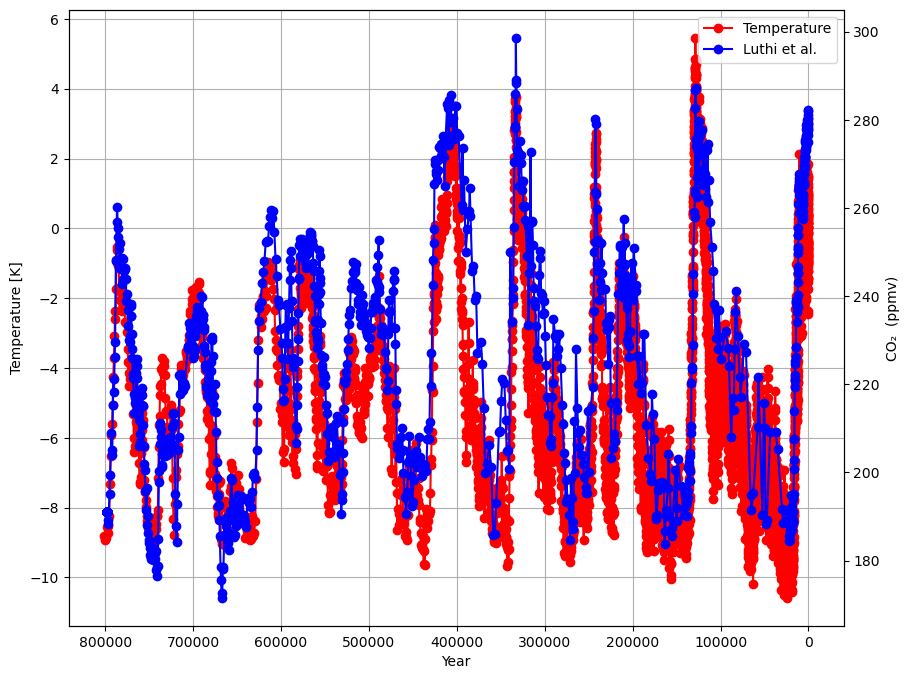

In [40]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
lns1 = ax.plot(df_temp2['Age'], df_temp2['Temperature'], color='red', label='Temperature', marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [K]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_COM_interpolated['EDC3_gas_a (yr)'], df_COM_interpolated['CO2 (ppmv)'], color='blue', label='Luthi et al.', marker = 'o')
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper right')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO\u2082  (ppmv)')
ax.grid(True) 
ax.set_xlim(ax.get_xlim()[::-1])


## "Long term" Irish data sets 
***



https://www.met.ie/state-of-the-irish-climate-report-2023

"It is expected that 2023 will be the warmest year on record for Ireland, beating the previous warmest year of 2022. For the first time, Ireland’s annual average temperature is greater than 11°C (record length 124 years). 2022 was the previous warmest year on record at nearly 10.9°C, narrowly beating 2007 by just 0.1°C."

Keith Lambkin, Head of Climate Services at Met Éireann says “Ireland has seen a remarkable year with rainfall and warming at unprecedented levels at times. These record-breaking extremes have knock-on consequences to much of society. Past weather events are no longer a reliable indicator of future weather events, but knowing this allows us to better plan and adapt to our changing climate.”#

Long term Irish data sets were obtained from this website: 
https://www.met.ie/climate/available-data/long-term-data-sets/

this webpage contains several historic data sets  

### Rainfall time series from 1850-2010 for Ireland 
***
An Island of Ireland Precipitation (IIP) series covering the period 1850-2010 for 25 locations has been constructed by researchers at Maynooth University and Met Éireann. This data was published in the International Journal of Climatology [1]. 

The file "*IIP_National series.csv*" contains the rainfall averaged over the 25 stations which is the one we will use. 
the data is contained in the dataframe ``df_rain1 ``


### Composite Rainfall Time Series from 1711-2016 for Ireland.
***
A continuous 305-year (1711-2016) monthly rainfall series has been created for the Island of Ireland using two key data sources, i) a previously unpublished UK Meteorological Office Note which contains annual rainfall anomalies and corresponding proportional monthly totals based on weather diaries and early observational records for the period 1711-1977 and, ii) a long-term, homogenised monthly rainfall series for the island for the period 1850-2016.
this data was publied in journal Climate of the Past [2]

the data is imported from the csv file "*IOI_1711_SERIES.csv*"
and stored in the dataframe ``df_rain2 ``

I really wish i would have read the full webpage before downloading and processing the data as this series contains the data from [1] and is in a much easier form to use. I must have spent a few hours converting the data from "*IIP_National series.csv*" into the dataframe ``df_rain1 `` .. .ah well. I have included all the coding for that even though the data is not used. In particular this peice of code to convert the month columns into a single column took me ages to figure out... 
``df_rain1 = pd.concat([df_rain1[col] for col in df_rain1.columns[0:]]) ``


### Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968)
***
The Ireland Long-term Maximum and Minimum Air Temperature dataset (ILMMT) comprises 12 long-term and 21 short-term raw daily maximum and minimum air temperature observations registered across the island of Ireland in the period 1831-1968. Detailed station metadata on instrumentation, observation and observing practices are included in the ILMMT dataset to support quality control and homogenisation procedures. The reconstruction of the ILMMT dataset is the result of a collaborative research project between NUI Galway and Met Éireann.

The ILMMT dataset was downloaded from http://edepositireland.ie/handle/2262/92442

Trinity College Dublin_1840-1959 data set was choosen. 

file "*Trinity College Dublin_1840-1959.csv*"

after examining this data.. it was far from complete. 

instead looked at the 
Phoenix Park Dublin_1831-1958
Phoenix-Park-Dublin_1831-1958.csv 

### More recent temperature data 1958-2022
***
to complete this data upto present day. Another data set was obtained from the webpage [4]
 https://data.gov.ie/dataset/mtm02-temperature 

this contains monthly Average Maximum Temperature, Average Minimum Temperature, Mean Temperature, Highest Temperature and Lowest Temperature for serveral metrological stations around the country for the time period 1958-present. I have selected data from Dublin airport which should compliment the Trinity College temperature data. And the time periods overlap well. 

this data was saved into a csv file named "*temp2_dublin_airport.csv*"


### References

[1] Noone, S., Murphy, C., Coll, J., Matthews, T., Mullan, D., Wilby, R.L. and Walsh, S. (2016), Homogenization and analysis of an expanded long-term monthly rainfall network for the Island of Ireland (1850–2010). Int. J. Climatol., 36: 2837-2853. https://doi.org/10.1002/joc.4522

[2] Murphy, Conor and Broderick, Ciaran and Burt, Timothy P. and Curley, Mary and Duffy, Catriona and Hall, Julia and Harrigan, Shaun and Matthews, Tom K.R. and Mcdonald, Neil and McCarthy, Gerard and McCarthy, Mark P. and Mullan, Donal and Noone, Simon and Osborn, Timothy J. and Ryan, Ciara and Sweeney, John and Thorne, Peter and Walsh, Seamus and Wilby, Robert L. (2018) A 305-year continuous monthly rainfall series for the island of Ireland (1711–2016). Climate of the Past, 14. pp. 413-440. ISSN 1814-9332


[3] Mateus, C.; Potito, A.; Curley, M. 2020. Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968). Geoscience Data Journal. http://dx.doi.org/10.1002/gdj3.92

[4] MTM02 - temperature - data.gov.ie. (n.d.). https://data.gov.ie/dataset/mtm02-temperature

In [41]:
# Import Monthly Irish rainfall data 1850-2010 [1]
relative_path6 = "data\\project2\\IIP_National_series.csv"
file_path6 = os.path.join(current_directory, relative_path6)
df_rain1 = pd.read_csv(file_path6, header= 2)
df_rain1.head()
 # data format is a pain in the a.. need to reformat to have two columns datetime and rainfall


Year    Jan   Feb   Mar    Apr    May    Jun    Jul    Aug   Sep    Oct  \
0  1850  113.5  86.4  38.6  138.3   59.7   54.5  103.4   76.3  70.5   62.7   
1  1851  195.0  55.2  79.9   54.7   45.0  101.5   90.3   96.6  49.4  113.4   
2  1852  161.4  92.4  44.6   44.4   70.2  179.4   68.6  110.1  57.3   88.7   
3  1853  144.7  43.0  83.5   75.3   33.2   77.5  100.5   82.9  60.2  185.1   
4  1854  138.6  36.0  37.3   18.8  100.0  110.4  102.6   60.5  47.8   77.8   

     Nov    Dec  
0  113.1  104.0  
1   45.4   68.8  
2  223.2  208.2  
3  106.0   48.4  
4   74.6   94.9

In [42]:
df_rain1 = df_rain1.drop(df_rain1.columns[0], axis=1) # drop the year column 
df_rain1.head(2)

Jan   Feb   Mar    Apr   May    Jun    Jul   Aug   Sep    Oct    Nov  \
0  113.5  86.4  38.6  138.3  59.7   54.5  103.4  76.3  70.5   62.7  113.1   
1  195.0  55.2  79.9   54.7  45.0  101.5   90.3  96.6  49.4  113.4   45.4   

     Dec  
0  104.0  
1   68.8

In [43]:
df_rain1 = df_rain1.transpose() # transpose so the monthly data is now vertical 
df_rain1.head(5)

0      1      2      3      4     5      6      7      8      9    ...  \
Jan  113.5  195.0  161.4  144.7  138.6  16.5  111.6   97.2   61.4   89.8  ...   
Feb   86.4   55.2   92.4   43.0   36.0  59.1   82.0   56.7   69.7   51.0  ...   
Mar   38.6   79.9   44.6   83.5   37.3  86.0   35.9   98.3   51.7   90.1  ...   
Apr  138.3   54.7   44.4   75.3   18.8  36.7   76.2  118.7  143.5  106.9  ...   
May   59.7   45.0   70.2   33.2  100.0  79.8  124.1   53.8   86.4   16.3  ...   

      151    152    153    154    155    156    157    158    159   160  
Jan  73.6  151.6   81.8  123.4  128.1   57.6  107.9  174.3  152.9  93.8  
Feb  80.5  160.2   65.2   52.3   51.4   54.6  107.8   58.0   36.5  52.6  
Mar  89.2   63.3   56.6   85.9   73.6  120.3   80.3  113.5   48.7  86.2  
Apr  83.0  102.1   79.3   67.4  105.1   47.3   26.9   45.1  120.9  56.9  
May  40.2  139.5  112.0   47.5   86.3  126.2   65.9   42.3   90.7  47.5  

[5 rows x 161 columns]

In [44]:
df_rain1 = pd.concat([df_rain1[col] for col in df_rain1.columns[0:]]) # takes monthly column data and concatates into one colomn
df_rain1 = pd.DataFrame(df_rain1)
df_rain1.head()

0
Jan  113.5
Feb   86.4
Mar   38.6
Apr  138.3
May   59.7

In [45]:
idx = pd.date_range("1850-01-31", periods = 1932, freq ="M", name = 'Date')
df_idx = pd.DataFrame(idx)
df_idx.head(2) 
#df_idx.tail(2)

Date
0 1850-01-31
1 1850-02-28

In [46]:
df_idx.reset_index(inplace=True, drop=True)
df_rain1.reset_index(inplace=True, drop=True)
df_rain1_idx = pd.concat([df_idx, df_rain1], axis = 1)
df_rain1_idx['Date'] = pd.to_datetime(df_rain1_idx['Date'])
df_rain1_idx.head(2)

Date      0
0 1850-01-31  113.5
1 1850-02-28   86.4

(-43799.0, 14640.0)

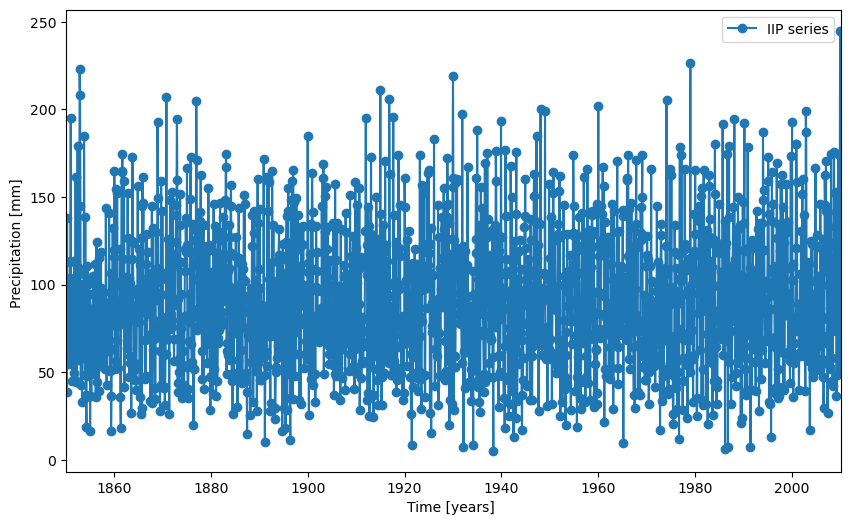

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(df_rain1_idx['Date'], df_rain1_idx[0], label = 'IIP series', marker = 'o')
plt.ylabel('Precipitation [mm] ')
plt.xlabel('Time [years] ')
plt.legend()
plt.xlim(datetime.strptime('1850-01-31', '%Y-%m-%d'), datetime.strptime('2010-01-31', '%Y-%m-%d'))

In [48]:
# Composite Rainfall Time Series from 1711-2016 for Ireland.[2]
relative_path7 = "data\\project2\\IOI_1711_SERIES.csv"
file_path7 = os.path.join(current_directory, relative_path7)
df_rain2 = pd.read_csv(file_path7)
df_rain2.head(2)

Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1

In [49]:
idx2 = pd.date_range("1711-01-31", periods = 3672, freq ="M", name = 'Date')
df_idx2 = pd.DataFrame(idx2)
df_idx2.head(2)

Date
0 1711-01-31
1 1711-02-28

In [50]:
df_rain2.reset_index(inplace=True, drop=True)
df_rain2_idx = pd.concat([df_idx2, df_rain2], axis = 1)
df_rain2_idx['Date'] = pd.to_datetime(df_rain2_idx['Date'])
df_rain2_idx.head(2)

Date  Year  Month  Median montly series
0 1711-01-31  1711      1                  16.4
1 1711-02-28  1711      2                  73.1

(-94568.0, 16831.0)

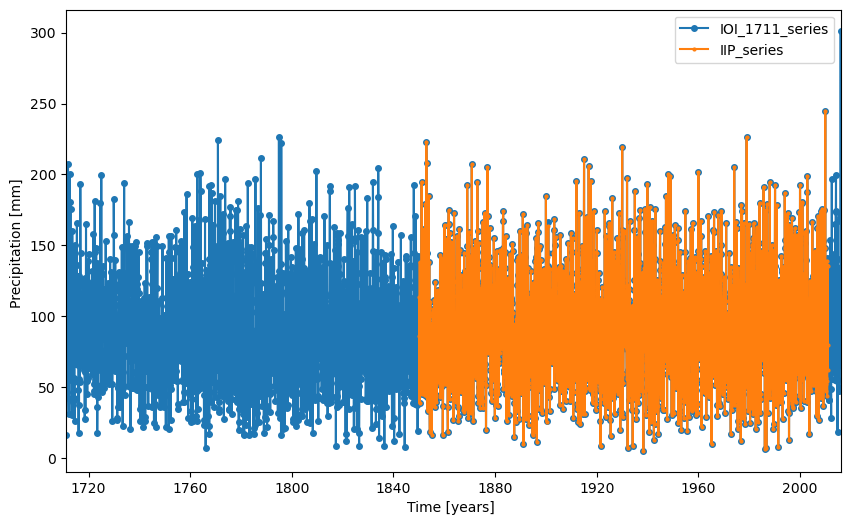

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(df_rain2_idx['Date'], df_rain2_idx['Median montly series'], label = 'IOI_1711_series', marker = 'o', markersize = 4)
plt.plot(df_rain1_idx['Date'], df_rain1_idx[0], label = 'IIP_series', marker = 'o', markersize = 2 )
plt.ylabel('Precipitation [mm] ')
plt.xlabel('Time [years] ')
plt.legend()
plt.xlim(datetime.strptime('1711-01-31', '%Y-%m-%d'), datetime.strptime('2016-01-31', '%Y-%m-%d'))

Let' add a linear fit trendline to the "IOI_1711_series" data set (`df_rain2_idx['Median montly series']`) to investigate any trend over time. 





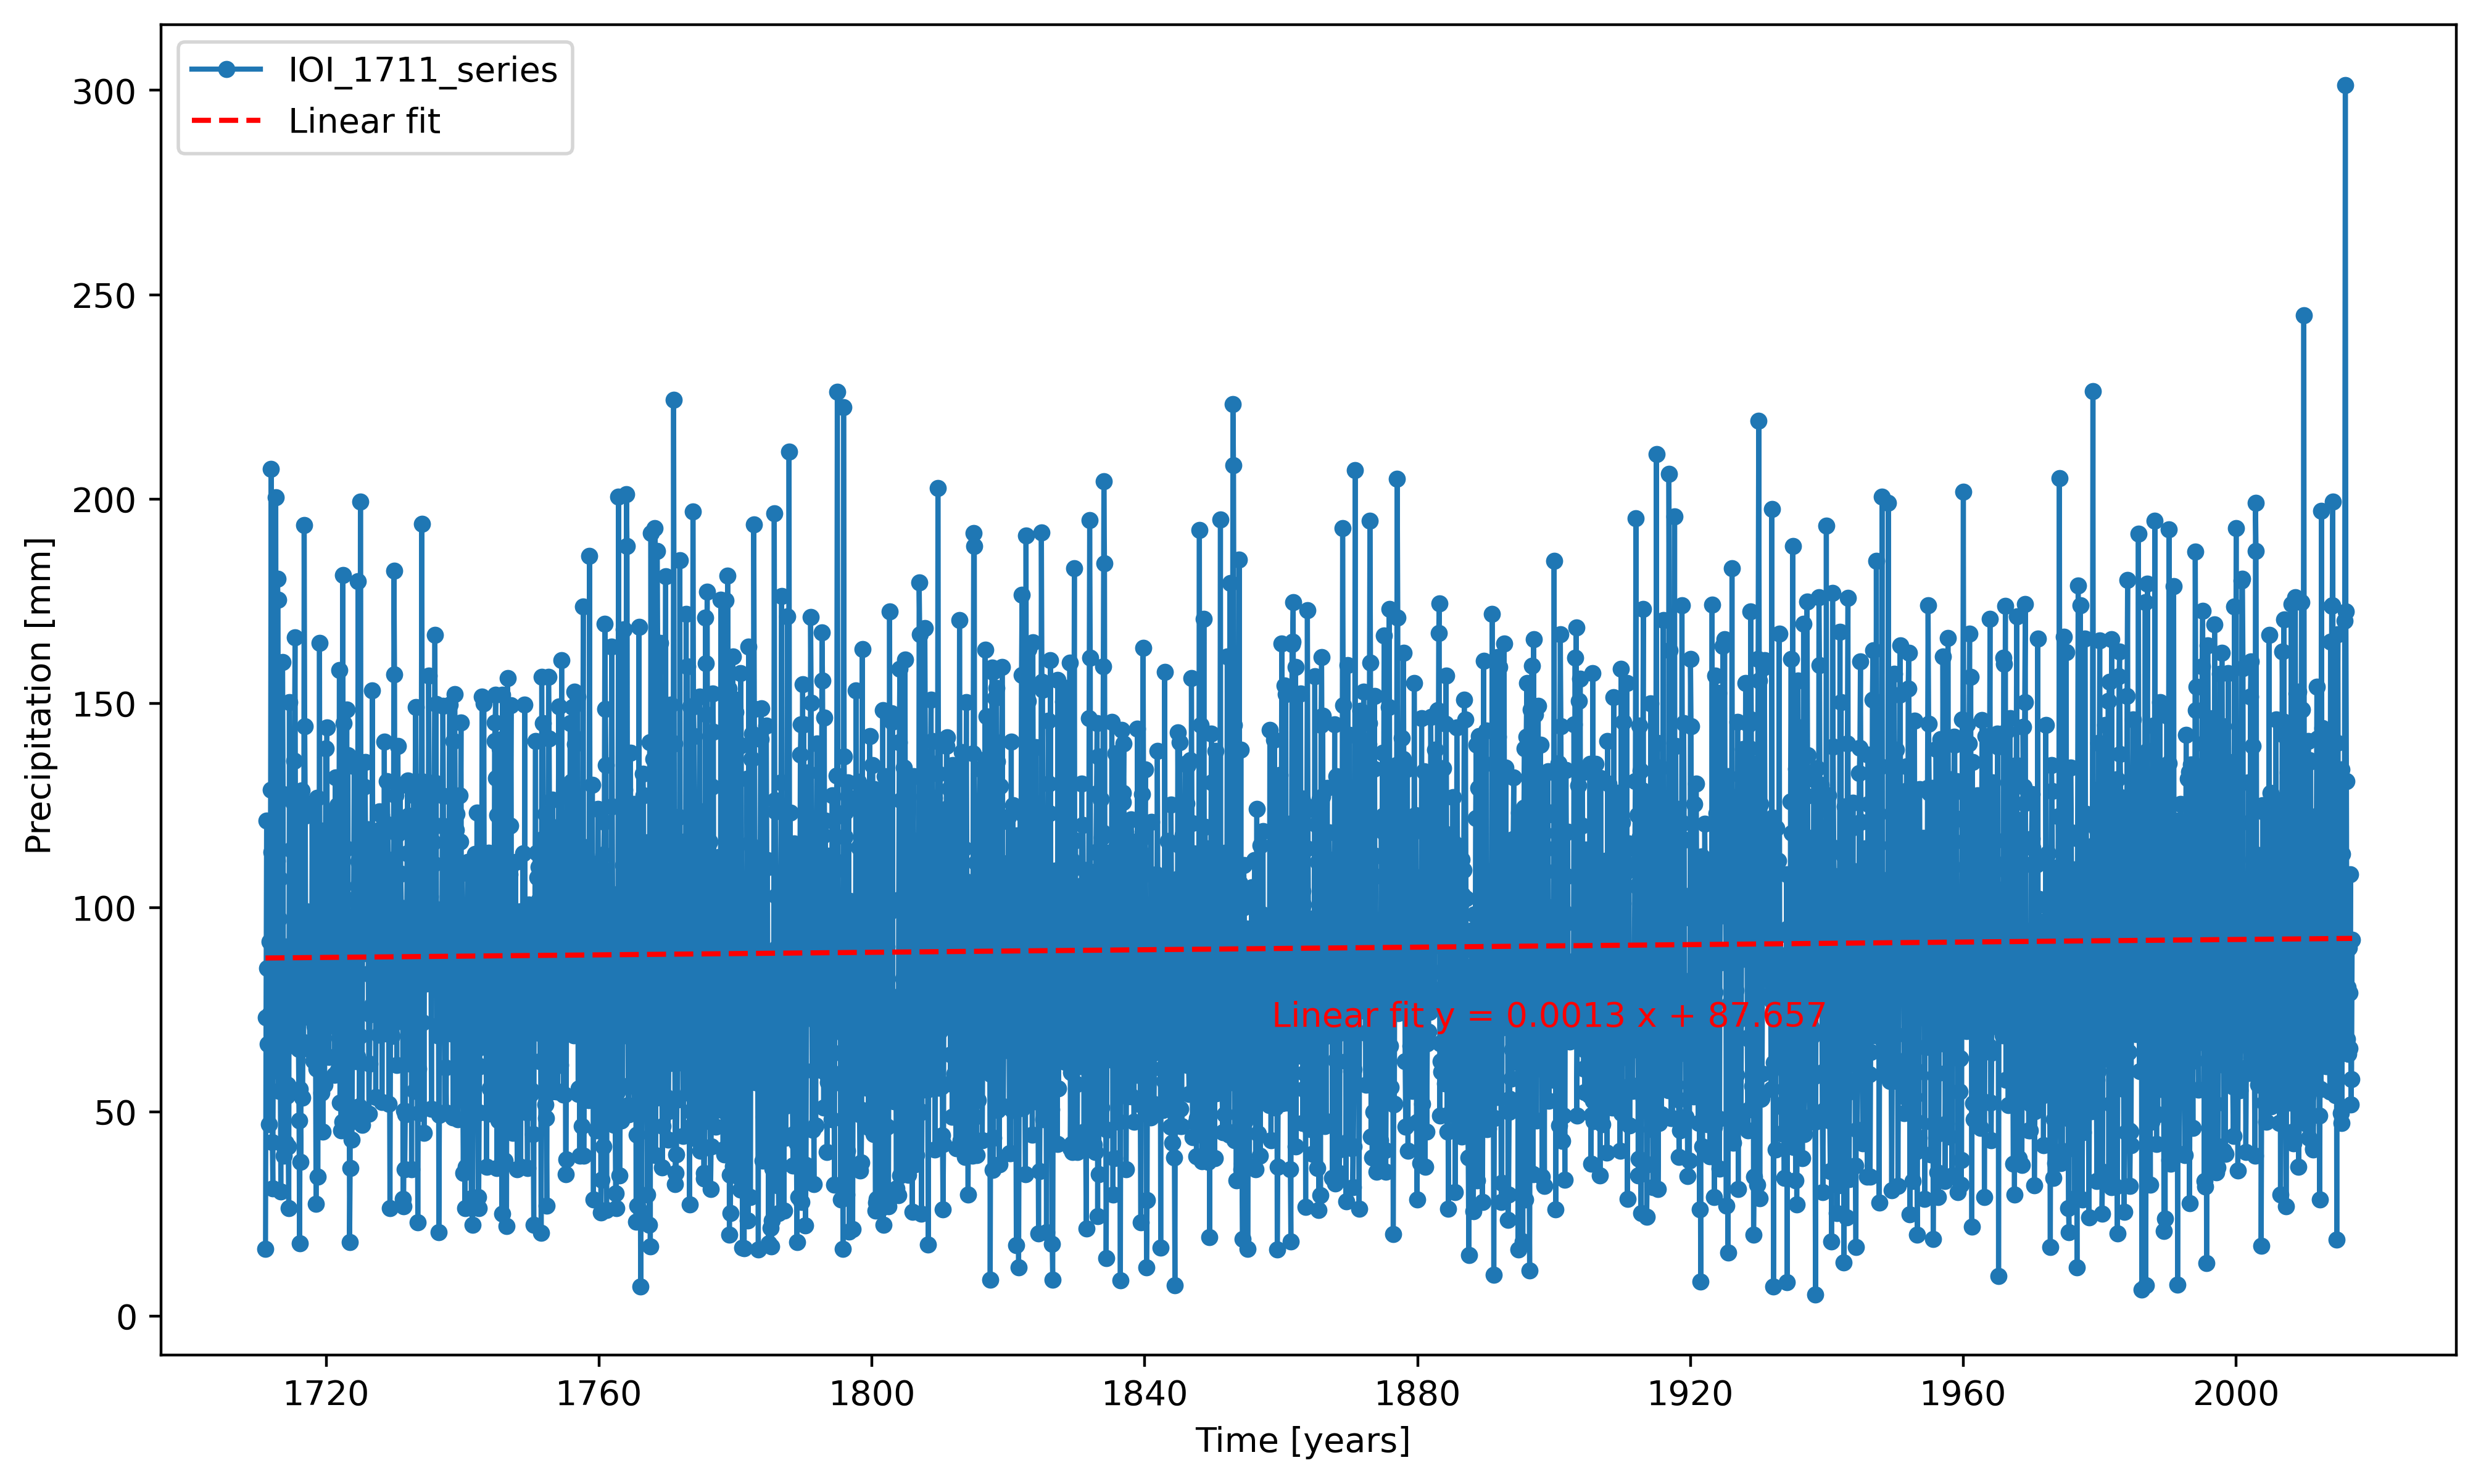

array([   0,    1,    2, ..., 3669, 3670, 3671])

In [52]:
# https://stackoverflow.com/questions/60704798/how-to-plot-a-linear-trendline-of-datetime-vs-value-with-matplotlib-and-pandas
# to improve the displayed image/plot quality: https://stackoverflow.com/questions/32807999/adjusting-figure-quality-in-matplotlib
# add text to the plt plot  https://stackoverflow.com/questions/16066695/add-an-extra-information-in-a-python-plot



# To perform the linear regression we need the dates to be numeric 
date_num = np.arange(df_rain2_idx['Date'].size) 
slope, intercept = np.polyfit(date_num, df_rain2_idx['Median montly series'], 1)

fig, ax = plt.subplots(figsize=(12,7), dpi=400)
ax = plt.plot(df_rain2_idx['Date'], df_rain2_idx['Median montly series'], label = 'IOI_1711_series', marker = 'o', markersize = 4)

# Plot trendlines
plt.ylabel('Precipitation [mm] ')
plt.xlabel('Time [years] ')
ax = plt.plot(df_rain2_idx['Date'], slope * date_num + intercept, 'r--', label='Linear fit')
#plt.plot(df_temp4['Date'], slope_min * date_numeric + intercept_min, 'g--', label='Trendline (Min)')



plt.figtext(.5, .3, f"Linear fit y = {slope:.4f} x + {intercept:.3f}", color = 'red')
plt.legend()
plt.show()
date_num


Looking at the slope of the linear fit trendline to the precipation data we see a very slight increase xxx / month in rainfall over time. 
Perhaps look over the pass 100 years? 50 years 

In [53]:
date_1 = df_rain1_idx['1950-01-31':'2000-01-31']

TypeError: cannot do slice indexing on RangeIndex with these indexers [1950-01-31] of type str

In [ ]:
date_num = np.arange(df_rain2_idx['Date'].size) 
slope, intercept = np.polyfit(date_num, df_rain2_idx['Median montly series'], 1)

date_1 = df_rain1_idx['1950-01-31':'2000-01-31']

fig, ax = plt.subplots(figsize=(12,7), dpi=400)
ax = plt.plot(df_rain2_idx['Date'], df_rain2_idx['Median montly series'], label = 'IOI_1711_series', marker = 'o', markersize = 4)

# Plot trendlines
plt.ylabel('Precipitation [mm] ')
plt.xlabel('Time [years] ')
ax = plt.plot(df_rain2_idx['Date'], slope * date_num + intercept, 'r--', label='Linear fit')
#plt.plot(df_temp4['Date'], slope_min * date_numeric + intercept_min, 'g--', label='Trendline (Min)')



plt.figtext(.5, .3, f"Linear fit y = {slope:.4f} x + {intercept:.3f}", color = 'red')
plt.legend()
plt.show()

### 4.1. Import temperature time series 

4.1.1. Trinity College Dublin_1840-1959

In [ ]:
# import Irish temperature data series [3]
#Trinity College Dublin_1840-1959 data Note to read this .csv file i needed to change the encoding from 'utf-8' to 'ISO-8859-1'

relative_path8 = "data\\project2\\Trinity College Dublin_1840-1959.csv"
file_path8 = os.path.join(current_directory, relative_path8)
df_temp1 = pd.read_csv(file_path8, encoding = 'ISO-8859-1')
df_temp1.head(2)

Year  Month  Day  Max (°F)  Min (°F)  Max (°C)  Min (°C)
0  1840      5    1       NaN      48.5       NaN       9.2
1  1840      5    2       NaN      45.6       NaN       7.6

In [ ]:
idx3 = pd.date_range("1840-05-01", periods = 43708 , freq ="D", name = 'Date')
df_idx3 = pd.DataFrame(idx3)
df_idx3.tail(2)

Date
43706 1959-12-30
43707 1959-12-31

In [ ]:
df_temp1.reset_index(inplace=True, drop=True)
df_temp1_idx = pd.concat([df_idx3, df_temp1], axis = 1)
df_temp1_idx['Date'] = pd.to_datetime(df_temp1_idx['Date'])
df_temp1_idx.head(2)

Date  Year  Month  Day  Max (°F)  Min (°F)  Max (°C)  Min (°C)
0 1840-05-01  1840      5    1       NaN      48.5       NaN       9.2
1 1840-05-02  1840      5    2       NaN      45.6       NaN       7.6

(-94568.0, 16831.0)

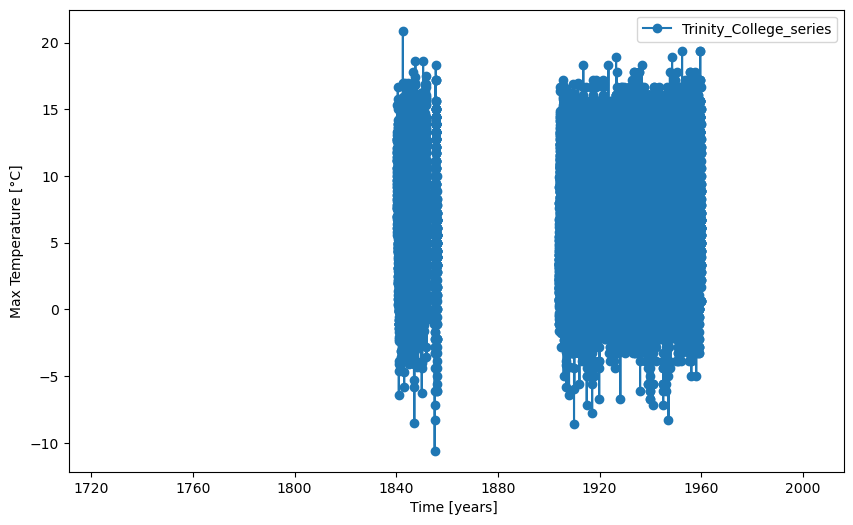

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_temp1_idx['Date'], df_temp1_idx['Min (°C)'], label = 'Trinity_College_series', marker = 'o', )
plt.ylabel('Max Temperature [\u00b0C]')
plt.xlabel('Time [years] ')
plt.legend()
plt.xlim(datetime.strptime('1711-01-31', '%Y-%m-%d'), datetime.strptime('2016-01-31', '%Y-%m-%d'))

This time series contains large gaps in the data. 

4.1.2. Phoenix-Park-Dublin_1831-1958

In [ ]:
# import Irish temperature data series [3]
# Phoenix-Park-Dublin_1831-1958.csv data Note to read this .csv file i needed to change the encoding from 'utf-8' to 'ISO-8859-1'
relative_path9 = "data\\project2\\Phoenix-Park-Dublin_1831-1958.csv"
file_path9 = os.path.join(current_directory, relative_path9)
df_temp2 = pd.read_csv(file_path9, encoding = 'ISO-8859-1')
df_temp2

Year  Month  Day  Max (°F)  Min (°F)  Max (°C)  Min (°C)
0      1831      1    1       NaN       NaN       NaN       NaN
1      1831      1    2       NaN       NaN       NaN       NaN
2      1831      1    3       NaN       NaN       NaN       NaN
3      1831      1    4       NaN       NaN       NaN       NaN
4      1831      1    5       NaN       NaN       NaN       NaN
...     ...    ...  ...       ...       ...       ...       ...
46746  1958     12   27      53.6      44.8      12.0       7.1
46747  1958     12   28      54.0      41.3      12.2       5.2
46748  1958     12   29      47.4      37.7       8.6       3.2
46749  1958     12   30      48.3      39.1       9.1       3.9
46750  1958     12   31      43.7      33.8       6.5       1.0

[46751 rows x 7 columns]

In [ ]:
idx4 = pd.date_range("1831-01-01", periods = 46751  , freq ="D", name = 'Date')
df_idx4 = pd.DataFrame(idx4)
df_idx4

Date
0     1831-01-01
1     1831-01-02
2     1831-01-03
3     1831-01-04
4     1831-01-05
...          ...
46746 1958-12-27
46747 1958-12-28
46748 1958-12-29
46749 1958-12-30
46750 1958-12-31

[46751 rows x 1 columns]

In [ ]:
df_temp2.reset_index(inplace=True, drop=True)
df_temp2_idx = pd.concat([df_idx4, df_temp2], axis = 1)
df_temp2_idx['Date'] = pd.to_datetime(df_temp2_idx['Date'])
df_temp2_idx

Date  Year  Month  Day  Max (°F)  Min (°F)  Max (°C)  Min (°C)
0     1831-01-01  1831      1    1       NaN       NaN       NaN       NaN
1     1831-01-02  1831      1    2       NaN       NaN       NaN       NaN
2     1831-01-03  1831      1    3       NaN       NaN       NaN       NaN
3     1831-01-04  1831      1    4       NaN       NaN       NaN       NaN
4     1831-01-05  1831      1    5       NaN       NaN       NaN       NaN
...          ...   ...    ...  ...       ...       ...       ...       ...
46746 1958-12-27  1958     12   27      53.6      44.8      12.0       7.1
46747 1958-12-28  1958     12   28      54.0      41.3      12.2       5.2
46748 1958-12-29  1958     12   29      47.4      37.7       8.6       3.2
46749 1958-12-30  1958     12   30      48.3      39.1       9.1       3.9
46750 1958-12-31  1958     12   31      43.7      33.8       6.5       1.0

[46751 rows x 8 columns]

(-50739.0, 16831.0)

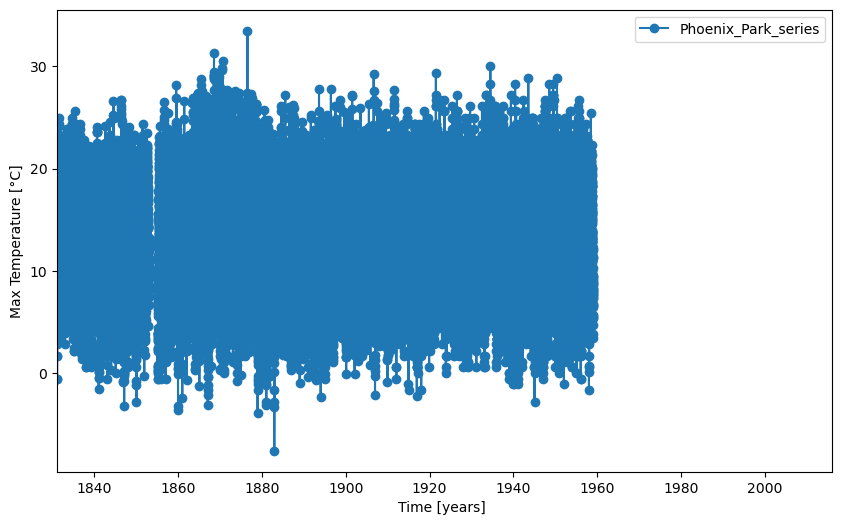

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_temp2_idx['Date'], df_temp2_idx['Max (°C)'], label = 'Phoenix_Park_series', marker = 'o', )
plt.ylabel('Max Temperature [\u00b0C]')
plt.xlabel('Time [years] ')
plt.legend()
plt.xlim(datetime.strptime('1831-01-31', '%Y-%m-%d'), datetime.strptime('2016-01-31', '%Y-%m-%d'))

This looks better. some small gaps but fairly consistent. 


import recent temperature data for an area close to Phoenix park - Dublin airport

In [ ]:
# import recent Irish temperature data series [3]
# Dublin airport 1958-2022.csv data Note to read this .csv file i needed to change the encoding from 'utf-8' to 'ISO-8859-1'
relative_path10 = "data\\project2\\temp2_dublin_airport.csv"
file_path10 = os.path.join(current_directory, relative_path10)
df_temp3 = pd.read_csv(file_path10, encoding = 'ISO-8859-1')
df_temp3

Unnamed: 0  Average Maximum Temperature  Average Minimum Temperature  \
0      1958M01                          7.5                          1.9   
1      1958M02                          8.2                          2.8   
2      1958M03                          7.1                          1.8   
3      1958M04                         11.2                          4.6   
4      1958M05                         13.7                          6.5   
..         ...                          ...                          ...   
775    2022M08                         21.3                         11.1   
776    2022M09                         17.2                          9.5   
777    2022M10                         15.6                          9.0   
778    2022M11                         12.0                          5.9   
779    2022M12                          7.5                          1.8   

     Mean Temperature  Highest Temperature  Lowest Temperature  
0                 4.7                 12.4                -7.0  
1                 5.5                 13.5                -3.1  
2                 4.5                 15.2                -5.0  
3                 7.9                 17.1                -1.2  
4                10.1                 20.6                 2.4  
..                ...                  ...                 ...  
775              16.2                 26.3                 6.0  
776              13.3                 20.1                 3.1  
777              12.3                 18.0                 1.3  
778               8.9                 16.5                -0.8  
779               4.7                 14.7                -4.2  

[780 rows x 6 columns]

In [ ]:
idx5 = pd.date_range("1958-01-01", periods = 780  , freq ="M", name = 'Date')
df_idx5 = pd.DataFrame(idx5)
df_idx5

Date
0   1958-01-31
1   1958-02-28
2   1958-03-31
3   1958-04-30
4   1958-05-31
..         ...
775 2022-08-31
776 2022-09-30
777 2022-10-31
778 2022-11-30
779 2022-12-31

[780 rows x 1 columns]

In [ ]:
df_temp3.reset_index(inplace=True, drop=True)
df_temp3_idx = pd.concat([df_idx5, df_temp3], axis = 1)
df_temp3_idx['Date'] = pd.to_datetime(df_temp3_idx['Date'])
df_temp3_idx.head(2)

Date Unnamed: 0  Average Maximum Temperature  \
0 1958-01-31    1958M01                          7.5   
1 1958-02-28    1958M02                          8.2   

   Average Minimum Temperature  Mean Temperature  Highest Temperature  \
0                          1.9               4.7                 12.4   
1                          2.8               5.5                 13.5   

   Lowest Temperature  
0                -7.0  
1                -3.1

the historical Phoenix park data was recorded daily.. resample to average monthly 

In [ ]:
df_temp2_idx.set_index('Date', inplace=True)
df_temp2_idx_monthly = df_temp2_idx.resample('M').mean()
df_temp2_idx_monthly.head(2)

Year  Month   Day  Max (°F)  Min (°F)  Max (°C)  Min (°C)
Date                                                                   
1831-01-31  1831.0    1.0  16.0     42.30    35.625  5.718182     2.025
1831-02-28  1831.0    2.0  14.5     47.15    36.500  8.416667     2.500

The date ranges overlap slightly,  Phoenix park ends 31- 12 -1958, Dublin airport starts 01-01- 1958. Need to trunate one. Let's trunate Phenoix park to 31-12-1957.  

In [ ]:
# https://stackoverflow.com/questions/49868647/how-to-slice-a-pandas-dataframe-based-on-datetime-index
df_temp2_idx_monthly_trun = df_temp2_idx_monthly['1831-01-31':'1957-12-31']
df_temp2_idx_monthly_trun.head(2)

Year  Month   Day  Max (°F)  Min (°F)  Max (°C)  Min (°C)
Date                                                                   
1831-01-31  1831.0    1.0  16.0     42.30    35.625  5.718182     2.025
1831-02-28  1831.0    2.0  14.5     47.15    36.500  8.416667     2.500

Concatate the average monthly maximum and average monthly minimum temeperature from the two data series', Phoenix Park ``df_temp2_idx_monthly_trun`` (1831-01-31 to 1957-12-31) and Dublin airport ``df_temp3_idx``(1958-01-31 to 2022-12-31) into one dataframe - ``df_temp4``

In [ ]:
temp4_Av_max = pd.concat([df_temp2_idx_monthly_trun['Max (°C)'], df_temp3_idx['Average Maximum Temperature']],ignore_index=True)
temp4_Av_min = pd.concat([df_temp2_idx_monthly_trun['Min (°C)'], df_temp3_idx['Average Minimum Temperature']],ignore_index=True)

generate a new datetime for this data series - ``df_idx6`` 

In [ ]:
idx6 = pd.date_range("1831-01-01", periods = 2304  , freq ="M", name = 'Date')

Make a new DataFrame `` df_temp4`` with the Date range as the index and average max and min temperature as columns  

In [ ]:
df_temp4 = pd.DataFrame({'Date': idx6, 'Av_max_temp': temp4_Av_max, 'Av_min_temp' : temp4_Av_min})
#df_temp4.set_index('Date', inplace=True)
df_temp4.head(2)

Date  Av_max_temp  Av_min_temp
0 1831-01-31     5.718182        2.025
1 1831-02-28     8.416667        2.500

In [ ]:
df_temp4.describe()

Av_max_temp  Av_min_temp
count  2274.000000  2264.000000
mean     13.157284     5.757466
std       4.428337     3.582112
min       2.328571    -4.387097
25%       9.300000     2.875242
50%      12.900000     5.200000
75%      17.196774     8.958629
max      24.348387    15.054545

LinAlgError: SVD did not converge in Linear Least Squares

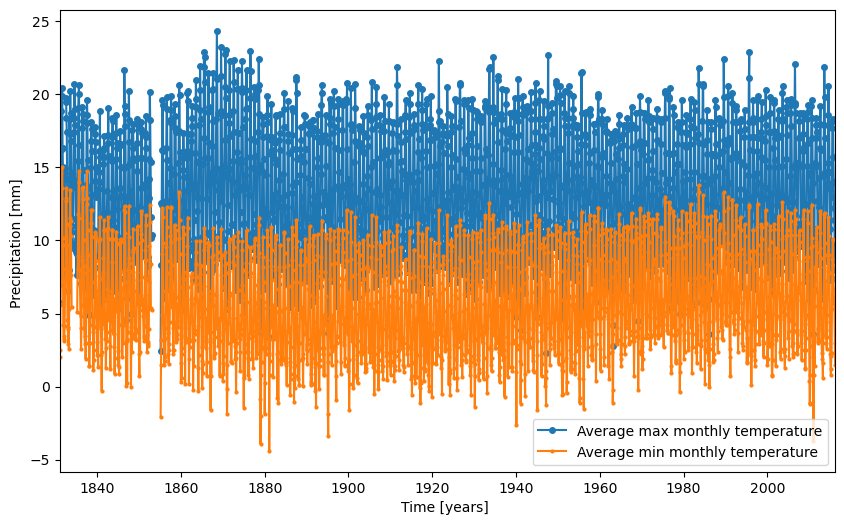

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_temp4['Date'], df_temp4['Av_max_temp'], label = 'Average max monthly temperature', marker = 'o', markersize = 4)
plt.plot(df_temp4['Date'], df_temp4['Av_min_temp'], label = 'Average min monthly temperature', marker = 'o', markersize = 2 )
plt.ylabel('Precipitation [mm] ')
plt.xlabel('Time [years] ')
plt.legend()
plt.xlim(datetime.strptime('1831-01-31', '%Y-%m-%d'), datetime.strptime('2016-01-31', '%Y-%m-%d'))
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-to-a-scatter-plot


date_numeric = np.arange(df_temp4['Date'].size)
slope_max, intercept_max = np.polyfit(date_numeric, df_temp4['Av_max_temp'], 1)
slope_min, intercept_min = np.polyfit(date_numeric, df_temp4['Av_min_temp'], 1)

# Plot trendlines
plt.plot(df_temp4['Date'], slope_max * date_numeric + intercept_max, 'r--', label='Trendline (Max)')
plt.plot(df_temp4['Date'], slope_min * date_numeric + intercept_min, 'g--', label='Trendline (Min)')

plt.legend()
plt.show()

# calc the trendline
#z = np.polyfit(df_temp4['Date'], df_temp4['Av_max_temp'], 1)
#p = np.poly1d(z)
#plt.plot(df_temp4['Date'],p(df_temp4['Date']),"r--")
# the line equation:
#print "y=%.6fx+(%.6f)"%(z[0],z[1])

Plot the average max and minimum monthly temperature ``df_temp4`` against the monthly precipation ``df_rain2_idx`` 

(-94568.0, 16831.0)

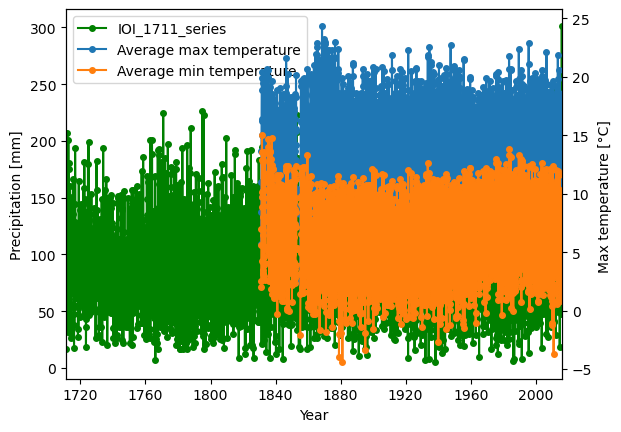

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
lns1 = ax.plot(df_rain2_idx['Date'], df_rain2_idx['Median montly series'], label = 'IOI_1711_series', marker = 'o', markersize = 4, color = 'green')

ax.set_xlabel('Year')
ax.set_ylabel('Precipitation [mm]')
#ax1.tick_params(axis='y')
ax2 = ax.twinx()  
lns2  = ax2.plot(df_temp4['Date'], df_temp4['Av_max_temp'], label = 'Average max temperature', marker = 'o', markersize = 4)
lns3  = ax2.plot(df_temp4['Date'], df_temp4['Av_min_temp'], label = 'Average min temperature', marker = 'o', markersize = 4)

lns = lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')
ax2.set_xlabel('Year')
ax2.set_ylabel('Max temperature [\u00b0C] ')
#ax2.title('Total Population Estimates (Persons 15 and over) 1950 - 2023')
#ax2.legend(loc=1)
#ax2.show()


plt.xlim(datetime.strptime('1711-01-31', '%Y-%m-%d'), datetime.strptime('2016-01-31', '%Y-%m-%d'))